In [ ]:
import torch
print(torch.__version__)
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


2.7.1+cu118


In [1]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))
print(torch.version.cuda)

True
0
1
NVIDIA GeForce RTX 3060 Laptop GPU
11.8


In [3]:
# ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os
import random

# ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê‰ª•Á°Æ‰øùÁªìÊûúÁöÑÂèØÂ§çÁé∞ÊÄß
torch.manual_seed(42)  # ËÆæÁΩÆ PyTorch ÁöÑÈöèÊú∫ÁßçÂ≠ê
np.random.seed(42)     # ËÆæÁΩÆ NumPy ÁöÑÈöèÊú∫ÁßçÂ≠ê
random.seed(42)        # ËÆæÁΩÆ Python ÂÜÖÁΩÆÈöèÊú∫Ê®°ÂùóÁöÑÁßçÂ≠ê
print("Torch version:", torch.__version__)
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)



# Ê£ÄÊµãÂπ∂ËÆæÁΩÆËÆæÂ§áÔºàCPU Êàñ GPUÔºâ
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ÊâìÂç∞ËÆæÂ§á‰ø°ÊÅØ
print("Using device:", device)

# Â¶ÇÊûú‰ΩøÁî®ÁöÑÊòØ GPUÔºåÊâìÂç∞ GPU ÁöÑËØ¶ÁªÜ‰ø°ÊÅØ
if device.type == "cuda":
    print("GPU Model:", torch.cuda.get_device_name(0))  # ÊâìÂç∞ GPU Ê®°Âûã
    print("CUDA Version:", torch.version.cuda)          # ÊâìÂç∞ CUDA ÁâàÊú¨

Torch version: 2.7.1+cu118
Numpy version: 1.24.4
Pandas version: 1.5.3
Using device: cuda
GPU Model: NVIDIA GeForce RTX 3060 Laptop GPU
CUDA Version: 11.8


Êñá‰ª∂Â∑≤ÊàêÂäüËß£ÂéãÂà∞ jena_climate
ÊàêÂäüÂä†ËΩΩ CSV Êñá‰ª∂ÔºåÊï∞ÊçÆË°åÊï∞: 420551

ËøõË°åÁõ∏ÂÖ≥ÊÄßÂàÜÊûê...


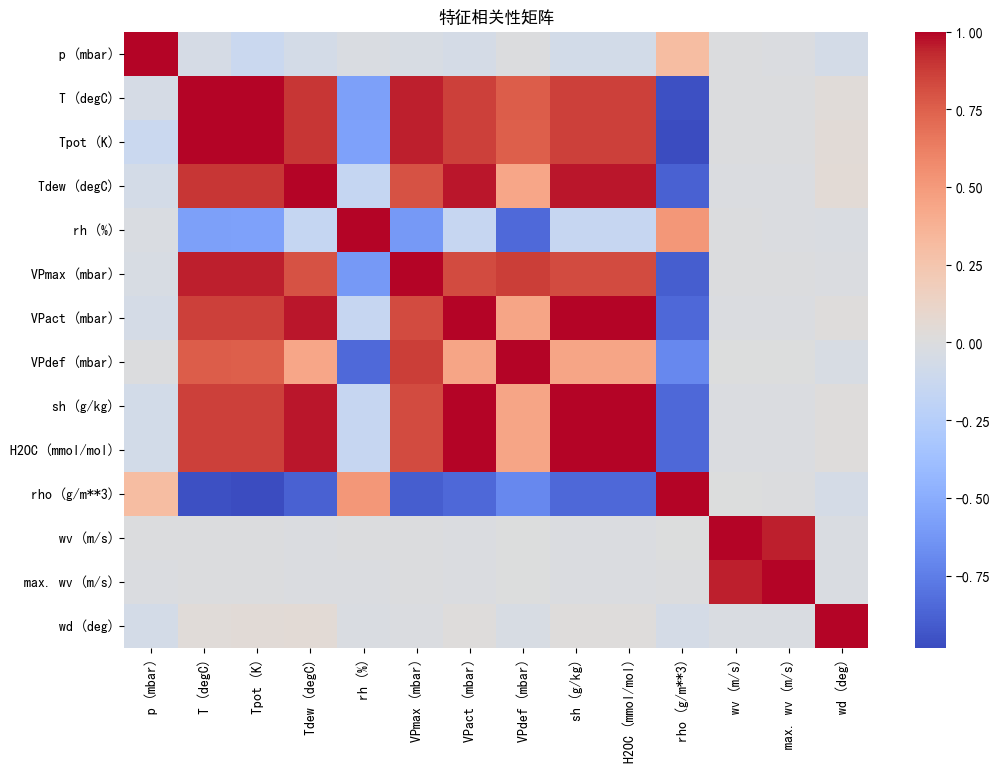

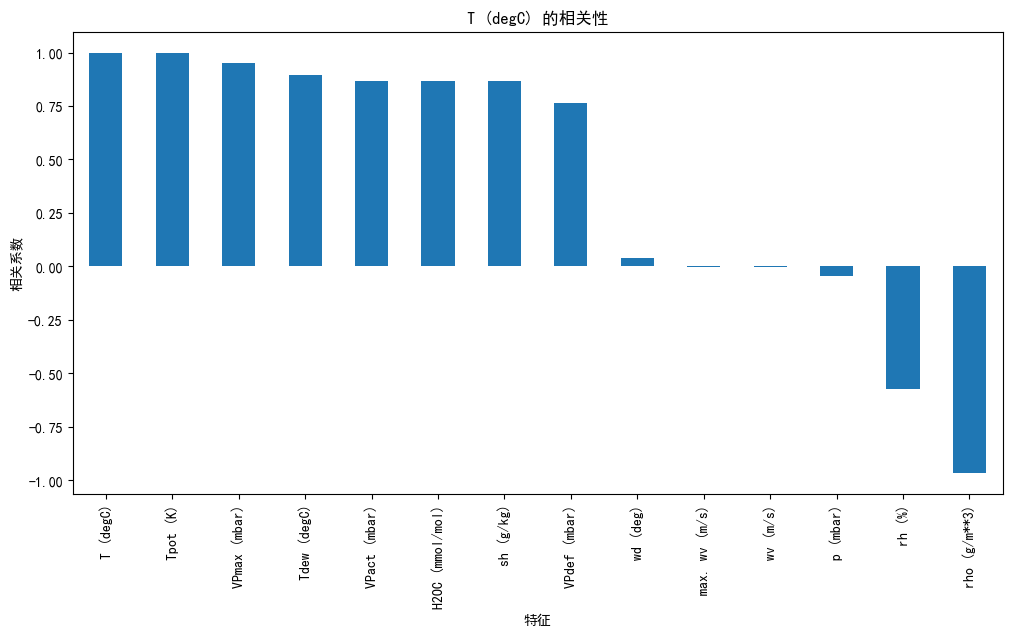


Ê†πÊçÆÁõ∏ÂÖ≥ÊÄßËá™Âä®ÈÄâÊã©ÁöÑÁâπÂæÅÔºö ['T (degC)', 'Tpot (K)', 'VPmax (mbar)', 'Tdew (degC)', 'VPact (mbar)', 'H2OC (mmol/mol)', 'sh (g/kg)', 'VPdef (mbar)', 'rh (%)', 'rho (g/m**3)']
ÈÄâÊã©ÁöÑÁâπÂæÅÂàó: ['T (degC)', 'Tpot (K)', 'VPmax (mbar)', 'Tdew (degC)', 'VPact (mbar)', 'H2OC (mmol/mol)', 'sh (g/kg)', 'VPdef (mbar)', 'rh (%)', 'rho (g/m**3)']
Á≠õÈÄâÂêéÁöÑÊï∞ÊçÆÂ∑≤‰øùÂ≠ò‰∏∫ weather.csv
ËÆ≠ÁªÉÈõÜÊ†∑Êú¨ËæìÂÖ• X ÁöÑÁª¥Â∫¶: (336368, 72, 10)
ËÆ≠ÁªÉÈõÜÊ†áÁ≠æ y ÁöÑÁª¥Â∫¶: (336368,)
È™åËØÅÈõÜÊ†∑Êú¨ËæìÂÖ• X ÁöÑÁª¥Â∫¶: (84111, 72, 10)
È™åËØÅÈõÜÊ†áÁ≠æ y ÁöÑÁª¥Â∫¶: (84111,)
ËÆ≠ÁªÉÈõÜÊ†∑Êú¨ËæìÂÖ• X ÁöÑÁª¥Â∫¶: (336368, 72, 10)
ËÆ≠ÁªÉÈõÜÊ†áÁ≠æ y ÁöÑÁª¥Â∫¶: (336368,)
È™åËØÅÈõÜÊ†∑Êú¨ËæìÂÖ• X ÁöÑÁª¥Â∫¶: (84111, 72, 10)
È™åËØÅÈõÜÊ†áÁ≠æ y ÁöÑÁª¥Â∫¶: (84111,)
Êó∂Èó¥Â∫èÂàóÊ†∑Êú¨Â∑≤‰øùÂ≠ò‰∏∫ X_train.npy, y_train.npy, X_val.npy, y_val.npy


In [4]:
"""
ËØ•ËÑöÊú¨ÁöÑ‰∏ªË¶ÅÂäüËÉΩÊòØÂ§ÑÁêÜÊ∞îË±°Êï∞ÊçÆ
ÂåÖÊã¨Ëß£ÂéãÊï∞ÊçÆÊñá‰ª∂„ÄÅÂä†ËΩΩÊï∞ÊçÆ„ÄÅÈ¢ÑÂ§ÑÁêÜ„ÄÅÂΩí‰∏ÄÂåñÂíåÊûÑÈÄ†Êó∂Èó¥Â∫èÂàóÊ†∑Êú¨„ÄÇ
ÂÖ∑‰ΩìÊ≠•È™§Â¶Ç‰∏ãÔºö
1. Ëß£Âéã ZIP Êñá‰ª∂ÔºåÊèêÂèñÂÖ∂‰∏≠ÁöÑ CSV Êï∞ÊçÆÊñá‰ª∂„ÄÇ
2. Âä†ËΩΩ CSV Êñá‰ª∂ÔºåËØªÂèñÊ∞îË±°Êï∞ÊçÆ„ÄÇ
3. Â∞ÜÊó•ÊúüÊó∂Èó¥ÂàóËΩ¨Êç¢‰∏∫ datetime Á±ªÂûãÔºå‰æø‰∫éÂêéÁª≠Â§ÑÁêÜ„ÄÇ
4. ÈÄâÊã©ÈúÄË¶ÅÁöÑÊ∞îË±°ÁâπÂæÅÂàóÔºåÂπ∂ÂéªÈô§Áº∫Â§±ÂÄº„ÄÇ
5. Â∞ÜÂ§ÑÁêÜÂêéÁöÑÊï∞ÊçÆ‰øùÂ≠ò‰∏∫Êñ∞ÁöÑ CSV Êñá‰ª∂ÔºàÂèØÈÄâÔºâ„ÄÇ
6. ÂØπÁâπÂæÅÊï∞ÊçÆËøõË°åÂΩí‰∏ÄÂåñÂ§ÑÁêÜÔºå‰ª•‰æøÊõ¥Â•ΩÂú∞ËÆ≠ÁªÉÊ®°Âûã„ÄÇ
7. ÊûÑÈÄ†Êó∂Èó¥Â∫èÂàóÊ†∑Êú¨ÔºåÂ∞ÜÊï∞ÊçÆÂàíÂàÜ‰∏∫ËæìÂÖ•Â∫èÂàó X ÂíåÁõÆÊ†áÊ†áÁ≠æ y„ÄÇ
8. ËæìÂá∫Ê†∑Êú¨ËæìÂÖ• X ÂíåÊ†áÁ≠æ y ÁöÑÁª¥Â∫¶‰ø°ÊÅØÔºåÁ°Æ‰øùÊï∞ÊçÆÊ†ºÂºèÊ≠£Á°Æ„ÄÇ
"""
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']       # ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì‰∏∫Èªë‰ΩìÔºàÈúÄË¶ÅÁ≥ªÁªüÊîØÊåÅÔºâ
plt.rcParams['axes.unicode_minus'] = False         # Ê≠£Á°ÆÊòæÁ§∫Ë¥üÂè∑

def preprocess_weather_data(zip_path, extract_path, 
                            features=None, sequence_length=72, 
                            target_column="T (degC)", 
                            use_auto_feature_selection=False, 
                            train_ratio=0.8):
    """
    Â§ÑÁêÜÊ∞îË±°Êï∞ÊçÆÁöÑ‰∏ªÂáΩÊï∞ÔºåÂåÖÊã¨Ëß£Âéã„ÄÅÁâπÂæÅÈÄâÊã©„ÄÅÂΩí‰∏ÄÂåñ„ÄÅÊó∂Èó¥Â∫èÂàóÊ†∑Êú¨ÁîüÊàêÁ≠â„ÄÇ
    
    ÂèÇÊï∞:
        zip_path (str): ZIP Êñá‰ª∂Ë∑ØÂæÑ
        extract_path (str): Ëß£ÂéãË∑ØÂæÑ
        features (list): ÊåáÂÆöÁâπÂæÅÂàóÔºåÈªòËÆ§‰ΩøÁî®Ê∏©Â∫¶„ÄÅÊπøÂ∫¶„ÄÅÈ£éÈÄü
        sequence_length (int): Êó∂Èó¥Â∫èÂàóÈïøÂ∫¶ÔºåÈªòËÆ§‰∏∫72
        target_column (str): Ë¶ÅÈ¢ÑÊµãÁöÑÁõÆÊ†áÂàó
        use_auto_feature_selection (bool): ÊòØÂê¶ÂêØÁî®Ëá™Âä®Áõ∏ÂÖ≥ÊÄßÁâπÂæÅÈÄâÊã©
        train_ratio (float): ËÆ≠ÁªÉÈõÜÂç†ÊÄªÊï∞ÊçÆÁöÑÊØî‰æãÔºåÈªòËÆ§‰∏∫0.8
    """
    import pandas as pd
    import numpy as np
    import zipfile
    import os
    import joblib
    import re
    import seaborn as sns
    from sklearn.preprocessing import MinMaxScaler

    # ÂÆâÂÖ®Êñá‰ª∂ÂêçÂ§ÑÁêÜÔºàÁî®‰∫é‰øùÂ≠ò scalerÔºâ
    def safe_filename(name):
        return re.sub(r'[^a-zA-Z0-9_]', '_', name)

    # ÈªòËÆ§ÁâπÂæÅ
    if features is None:
        features = ["T (degC)", "rh (%)", "wv (m/s)"]

    # ========== 1. Ëß£Âéã ZIP Êñá‰ª∂ ==========
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Êñá‰ª∂Â∑≤ÊàêÂäüËß£ÂéãÂà∞ {extract_path}")

    # ========== 2. Âä†ËΩΩ CSV Êñá‰ª∂ ==========
    csv_path = os.path.join(extract_path, "jena_climate_2009_2016.csv")
    df = pd.read_csv(csv_path)
    print(f"ÊàêÂäüÂä†ËΩΩ CSV Êñá‰ª∂ÔºåÊï∞ÊçÆË°åÊï∞: {len(df)}")

    # ========== 3. Êó•ÊúüÊó∂Èó¥ÂàóËΩ¨Êç¢ ==========
    df["Date Time"] = pd.to_datetime(df["Date Time"])

    # ========== 4. Ëá™Âä®Áõ∏ÂÖ≥ÊÄßÁâπÂæÅÈÄâÊã©ÔºàÂèØÈÄâÔºâ ==========
    if use_auto_feature_selection:
        print("\nËøõË°åÁõ∏ÂÖ≥ÊÄßÂàÜÊûê...")
        correlation_matrix = df.corr(numeric_only=True)

        correlations_with_target = correlation_matrix[target_column].sort_values(ascending=False)

        # ÁÉ≠ÂäõÂõæÂ±ïÁ§∫
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
        plt.title("ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÁü©Èòµ")
        plt.show()

        # Êü±Áä∂ÂõæÂ±ïÁ§∫‰∏éÁõÆÊ†áÁöÑÁõ∏ÂÖ≥ÊÄß
        correlations_with_target.plot(kind='bar', figsize=(12, 6))
        plt.title(f"{target_column} ÁöÑÁõ∏ÂÖ≥ÊÄß")
        plt.xlabel("ÁâπÂæÅ")
        plt.ylabel("Áõ∏ÂÖ≥Á≥ªÊï∞")
        plt.show()

        # ÈÄâÊã©ÁªùÂØπÁõ∏ÂÖ≥ÊÄßÂ§ß‰∫é 0.5 ÁöÑÁâπÂæÅ
        selected_features = correlations_with_target[abs(correlations_with_target) > 0.5].index.tolist()
        print("\nÊ†πÊçÆÁõ∏ÂÖ≥ÊÄßËá™Âä®ÈÄâÊã©ÁöÑÁâπÂæÅÔºö", selected_features)

        # ÈÅøÂÖçÈáçÂ§çÂåÖÂê´ÁõÆÊ†áÂàó
        if target_column in selected_features:
            selected_features.remove(target_column)
        features = [target_column] + selected_features

    # ========== 5. Á≠õÈÄâÊåáÂÆöÁâπÂæÅÂàó ==========
    missing_features = [f for f in features if f not in df.columns]
    if missing_features:
        raise ValueError(f"‰ª•‰∏ãÁâπÂæÅÂàó‰∏çÂ≠òÂú®‰∫éÊï∞ÊçÆ‰∏≠: {missing_features}")

    # ÊèêÂèñÂπ∂ÂéªÈô§Áº∫Â§±ÂÄº
    df_selected = df[["Date Time"] + features].dropna()
    print(f"ÈÄâÊã©ÁöÑÁâπÂæÅÂàó: {features}")

    # ========== 6. ‰øùÂ≠òÂéüÂßãÁ≠õÈÄâÊï∞ÊçÆ ==========
    df_selected.to_csv("weather.csv", index=False)
    print("Á≠õÈÄâÂêéÁöÑÊï∞ÊçÆÂ∑≤‰øùÂ≠ò‰∏∫ weather.csv")

    # ========== 7. ÊØèÂàóÂàÜÂà´ÂΩí‰∏ÄÂåñÂπ∂ÊãºÊé• ==========
    # Âú®ÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜ‰πãÂâçÔºåÂÖàËøõË°åÂΩí‰∏ÄÂåñÊìç‰Ωú
    train_size = int(train_ratio * len(df_selected))
    train_data = df_selected.iloc[:train_size]
    val_data = df_selected.iloc[train_size:]

    scalers = {}
    scaled_values_train = []
    scaled_values_val = []

    for col in features:
        scaler = MinMaxScaler()
        train_values = train_data[[col]].values
        val_values = val_data[[col]].values

        scaled_train = scaler.fit_transform(train_values)
        scaled_val = scaler.transform(val_values)

        scaled_values_train.append(scaled_train)
        scaled_values_val.append(scaled_val)

        scalers[col] = scaler
        joblib.dump(scaler, f"{safe_filename(col)}_scaler.pkl")

    # ÊãºÊé•ÂΩí‰∏ÄÂåñÂêéÁöÑÊï∞ÊçÆ
    data_scaled_train = np.concatenate(scaled_values_train, axis=1)
    data_scaled_val = np.concatenate(scaled_values_val, axis=1)

    df_scaled_train = pd.DataFrame(data_scaled_train, columns=features)
    df_scaled_val = pd.DataFrame(data_scaled_val, columns=features)

    df_scaled_train.insert(0, "Date Time", train_data["Date Time"].values)
    df_scaled_val.insert(0, "Date Time", val_data["Date Time"].values)

    # ‰øùÂ≠òÂΩí‰∏ÄÂåñÂêéÁöÑÊï∞ÊçÆ
    df_scaled_train.to_csv("scaled_weather_train.csv", index=False)
    df_scaled_val.to_csv("scaled_weather_val.csv", index=False)

    # ========== 8. ÊûÑÈÄ†Êó∂Èó¥Â∫èÂàóÊ†∑Êú¨ ==========
    def create_sequences(data, sequence_length, target_column_index):
        """
        ÊûÑÈÄ†Êó∂Èó¥Â∫èÂàóÊ†∑Êú¨ (X, y)
        X: [samples, sequence_length, features]
        y: [samples]
        """
        X, y = [], []
        for i in range(len(data) - sequence_length):
            X.append(data[i:i + sequence_length])
            y.append(data[i + sequence_length][target_column_index])
        return np.array(X), np.array(y)
    # Ëé∑ÂèñÁõÆÊ†áÂàóÁöÑÁ¥¢Âºï
    target_column_index = features.index(target_column)

    # ÊûÑÂª∫Êó∂Èó¥Â∫èÂàóÊ†∑Êú¨
   # ÊûÑÂª∫Êó∂Èó¥Â∫èÂàóÊ†∑Êú¨
   # ÊãºÊé•ËÆ≠ÁªÉ+È™åËØÅÊï∞ÊçÆÔºàÈÅøÂÖçÈ™åËØÅÊ†∑Êú¨Áº∫Â∞ëÂâçÁΩÆÂ∫èÂàóÔºâ
    data_scaled_total = np.concatenate([data_scaled_train, data_scaled_val], axis=0)

# ËÆ∞ÂΩïÂàáÂàÜÁÇπÁ¥¢Âºï
    train_end_idx = len(data_scaled_train)
    # Èò≤Ê≠¢È™åËØÅÊ†∑Êú¨ÊûÑÈÄ†Ë∂äÁïåÔºà‰æãÂ¶ÇÊï∞ÊçÆÂ§™Â∞èÊàñ sequence_length Â§™Â§ßÔºâ
    if train_end_idx < sequence_length:
        raise ValueError("ËÆ≠ÁªÉÈõÜÂ§™Â∞èÔºåÊó†Ê≥ïÊûÑÈÄ†È™åËØÅÈõÜÊ†∑Êú¨ÔºåËØ∑ÂáèÂ∞è sequence_length Êàñ‰ΩøÁî®Êõ¥Â§öÊï∞ÊçÆ„ÄÇ")

# ÊûÑÂª∫ËÆ≠ÁªÉÈõÜÊ†∑Êú¨Ôºà‰ªÖÁî®ËÆ≠ÁªÉÈÉ®ÂàÜÔºâ
    X_train, y_train = create_sequences(data_scaled_total[:train_end_idx], sequence_length, target_column_index)

# ÊûÑÂª∫È™åËØÅÈõÜÊ†∑Êú¨ÔºàËµ∑ÂßãÁÇπ‰ªé train_end_idx - sequence_lengthÔºåÁ°Æ‰øùÊØè‰∏™Â∫èÂàóÈÉΩÂÆåÊï¥Ôºâ
    X_val, y_val = create_sequences(data_scaled_total[train_end_idx - sequence_length:], sequence_length, target_column_index)

    #X_train, y_train = create_sequences(data_scaled_train, sequence_length, target_column_index)
    #X_val, y_val = create_sequences(data_scaled_val, sequence_length, target_column_index)# ËæìÂá∫Ê†∑Êú¨Áª¥Â∫¶Âπ∂‰øùÂ≠ò
    print("ËÆ≠ÁªÉÈõÜÊ†∑Êú¨ËæìÂÖ• X ÁöÑÁª¥Â∫¶:", X_train.shape)
    print("ËÆ≠ÁªÉÈõÜÊ†áÁ≠æ y ÁöÑÁª¥Â∫¶:", y_train.shape)
    print("È™åËØÅÈõÜÊ†∑Êú¨ËæìÂÖ• X ÁöÑÁª¥Â∫¶:", X_val.shape)
    print("È™åËØÅÈõÜÊ†áÁ≠æ y ÁöÑÁª¥Â∫¶:", y_val.shape)
    
    # ========== 9. ËæìÂá∫Ê†∑Êú¨Áª¥Â∫¶Âπ∂‰øùÂ≠ò ==========
    print("ËÆ≠ÁªÉÈõÜÊ†∑Êú¨ËæìÂÖ• X ÁöÑÁª¥Â∫¶:", X_train.shape)
    print("ËÆ≠ÁªÉÈõÜÊ†áÁ≠æ y ÁöÑÁª¥Â∫¶:", y_train.shape)
    print("È™åËØÅÈõÜÊ†∑Êú¨ËæìÂÖ• X ÁöÑÁª¥Â∫¶:", X_val.shape)
    print("È™åËØÅÈõÜÊ†áÁ≠æ y ÁöÑÁª¥Â∫¶:", y_val.shape)

    np.save("X_train.npy", X_train)
    np.save("y_train.npy", y_train)
    np.save("X_val.npy", X_val)
    np.save("y_val.npy", y_val)
    print("Êó∂Èó¥Â∫èÂàóÊ†∑Êú¨Â∑≤‰øùÂ≠ò‰∏∫ X_train.npy, y_train.npy, X_val.npy, y_val.npy")


# Ë∞ÉÁî®Á§∫‰æã
zip_path = "jena_climate.zip"
extract_path = "jena_climate"
preprocess_weather_data(zip_path, extract_path, use_auto_feature_selection=True)

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split

"""
ËØ•‰ª£Á†ÅÁöÑÂäüËÉΩÊòØÂ∞ÜÊ∞îË±°Êï∞ÊçÆÂ∞ÅË£Ö‰∏∫ PyTorch Êï∞ÊçÆÈõÜÔºåÂπ∂ÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜ„ÄÇ
‰∏ªË¶ÅÊ≠•È™§Ôºö
1. ÂÆö‰πâ‰∏Ä‰∏™ÁªßÊâøËá™ Dataset ÁöÑ WeatherDataset Á±ªÔºåÁî®‰∫éÂ∞ÅË£ÖÊ∞îË±°Êï∞ÊçÆ„ÄÇ
2. ÂàõÂª∫Êï∞ÊçÆÈõÜÂÆû‰æãÔºåÂπ∂Ê†πÊçÆÊåáÂÆöÊØî‰æãÈöèÊú∫ÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜ„ÄÇ
3. ÂàõÂª∫ËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜÁöÑÊï∞ÊçÆÂä†ËΩΩÂô® DataLoader Áî®‰∫éÊâπÈáèÂä†ËΩΩÊï∞ÊçÆ„ÄÇ
"""

# ÂÆö‰πâ‰∏Ä‰∏™Â§©Ê∞îÊï∞ÊçÆÈõÜÁ±ªÔºåÁªßÊâøËá™ torch.utils.data.Dataset
class WeatherDataset(Dataset):
    """
    Â§©Ê∞îÊï∞ÊçÆÈõÜÁ±ªÔºåÁî®‰∫éÂ∞ÅË£ÖÊ∞îË±°Êï∞ÊçÆ„ÄÇ
    :param X: ÁâπÂæÅÊï∞ÊçÆ
    :param y: ÁõÆÊ†áÊï∞ÊçÆ
    """
    def __init__(self, X, y):
        # ÂàùÂßãÂåñÂáΩÊï∞ÔºåÂ∞ÜËæìÂÖ•ÁöÑÁâπÂæÅÊï∞ÊçÆ X ÂíåÁõÆÊ†áÊï∞ÊçÆ y ËΩ¨Êç¢‰∏∫ torch Âº†Èáè
        self.X = torch.tensor(X, dtype=torch.float32)  # ÁâπÂæÅÊï∞ÊçÆ
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # ‰ª•Á°Æ‰øùËæìÂá∫ÂΩ¢Áä∂‰∏∫ (batch, 1)ÔºåÊñπ‰æøÂõûÂΩíÊ®°ÂûãÂ§ÑÁêÜ

    def __len__(self):
        """
        ËøîÂõûÊï∞ÊçÆÈõÜÁöÑÈïøÂ∫¶ÔºåÂç≥Ê†∑Êú¨Êï∞Èáè„ÄÇ
        """
        return len(self.X)

    def __getitem__(self, idx):
        """
        Ê†πÊçÆÁ¥¢Âºï idx Ëé∑ÂèñÊï∞ÊçÆÈõÜ‰∏≠ÁöÑ‰∏Ä‰∏™Ê†∑Êú¨ÔºåËøîÂõûÁâπÂæÅÂíåÁõÆÊ†á„ÄÇ
        :param idx: Ê†∑Êú¨Á¥¢Âºï
        :return: ÁâπÂæÅÂíåÁõÆÊ†á
        """
        return self.X[idx], self.y[idx]

def create_data_loaders(X, y, train_ratio=0.8, batch_size=32, shuffle_train=True, shuffle_val=False):
    """
    ÂàõÂª∫ËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜÁöÑÊï∞ÊçÆÂä†ËΩΩÂô®„ÄÇ
    :param X: ÁâπÂæÅÊï∞ÊçÆ
    :param y: ÁõÆÊ†áÊï∞ÊçÆ
    :param train_ratio: ËÆ≠ÁªÉÈõÜÂç†ÊÄªÊï∞ÊçÆÈõÜÁöÑÊØî‰æãÔºåÈªòËÆ§‰∏∫ 0.8
    :param batch_size: ÊØè‰∏™ÊâπÊ¨°ÁöÑÊ†∑Êú¨Êï∞ÈáèÔºåÈªòËÆ§‰∏∫ 32
    :param shuffle_train: ÊòØÂê¶Êâì‰π±ËÆ≠ÁªÉÈõÜÔºåÈªòËÆ§‰∏∫ True
    :param shuffle_val: ÊòØÂê¶Êâì‰π±È™åËØÅÈõÜÔºåÈªòËÆ§‰∏∫ False
    :return: ËÆ≠ÁªÉÈõÜÊï∞ÊçÆÂä†ËΩΩÂô®ÂíåÈ™åËØÅÈõÜÊï∞ÊçÆÂä†ËΩΩÂô®
    """
    # Ê£ÄÊü•ËæìÂÖ•Êï∞ÊçÆÊòØÂê¶‰∏∫Á©∫
    if len(X) == 0 or len(y) == 0:
        raise ValueError("ËæìÂÖ•Êï∞ÊçÆ‰∏çËÉΩ‰∏∫Á©∫")
    # ÂàõÂª∫Êï∞ÊçÆÈõÜÂÆû‰æã
    dataset = WeatherDataset(X, y)

    # ËÆ°ÁÆóËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜÁöÑÂ§ßÂ∞è
    train_size = int(train_ratio * len(dataset))
    val_size = len(dataset) - train_size

    # ÈöèÊú∫ÂàíÂàÜÊï∞ÊçÆÈõÜ‰∏∫ËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜ
    #train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    train_dataset = torch.utils.data.Subset(dataset, range(train_size))
    val_dataset = torch.utils.data.Subset(dataset, range(train_size, len(dataset)))
    # ÂàõÂª∫ËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜÁöÑÊï∞ÊçÆÂä†ËΩΩÂô®
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle_train)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=shuffle_val)

    return train_loader, val_loader

# Á§∫‰æãÔºö‰ΩøÁî®Â∞ÅË£ÖÁöÑÂáΩÊï∞ÂàõÂª∫Êï∞ÊçÆÂä†ËΩΩÂô®
# ÂÅáËÆæ X Âíå y ÂàÜÂà´ÊòØÁâπÂæÅÊï∞ÊçÆÂíåÁõÆÊ†áÊï∞ÊçÆÔºàÈúÄË¶ÅÊèêÂâçÂÆö‰πâÔºâ
# train_loader, val_loader = create_data_loaders(X, y)

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# === ÂèÇÊï∞Ê±áÊÄª ===
# ËæìÂÖ•ÁâπÂæÅÁª¥Â∫¶: input_dim
# ÈöêËóèÂ±ÇÁª¥Â∫¶: hidden_dim (ÈªòËÆ§ÂÄº: 64)
# ÊøÄÁ¥†Ê®°ÂùóÈöêËóèÂ±ÇÁª¥Â∫¶: hormone_dim (ÈªòËÆ§ÂÄº: 32)
# ÊúÄÂ§ßÂ∫èÂàóÈïøÂ∫¶: max_seq_len (ÈªòËÆ§ÂÄº: 72)
# Ê±†ÂåñÁ≠ñÁï•: pooling (ÈªòËÆ§ÂÄº: "mean"ÔºåÂèØÈÄâÂÄº: "mean", "max", "last", "attention")
# ÂõæÊ≥®ÊÑèÂäõÂ±ÇÂ§öÂ§¥Ê≥®ÊÑèÂäõÂ§¥Êï∞: n_heads (ÈªòËÆ§ÂÄº: 8)
# Dropout Ê¶ÇÁéá: dropout (ÈªòËÆ§ÂÄº: 0.1)
# Transformer ÁºñÁ†ÅÂô®ÂâçÈ¶àÁΩëÁªúÁª¥Â∫¶: dim_feedforward (ÈªòËÆ§ÂÄº: hidden_dim * 4)
# Transformer ÁºñÁ†ÅÂô®Â±ÇÊï∞: num_layers (ÈªòËÆ§ÂÄº: 1)

In [7]:
class GraphAttentionLayer(nn.Module):
    """
    ÂõæÊ≥®ÊÑèÂäõÂ±ÇÔºåÁî®‰∫éÊ®°ÊãüËäÇÁÇπ‰πãÈó¥ÁöÑÈó¥Êé•ÂΩ±Âìç„ÄÇ
    ÂèÇÊï∞Ôºö
        in_dim (int): ËæìÂÖ•ÁâπÂæÅÁöÑÁª¥Â∫¶
        out_dim (int): ËæìÂá∫ÁâπÂæÅÁöÑÁª¥Â∫¶
        n_heads (int): Â§öÂ§¥Ê≥®ÊÑèÂäõÁöÑÂ§¥Êï∞ÔºåÈªòËÆ§‰∏∫ 8
        dropout (float): Dropout Ê¶ÇÁéáÔºåÈªòËÆ§‰∏∫ 0.1
    """
    def __init__(self, in_dim, out_dim, n_heads=8, dropout=0.1):
        super(GraphAttentionLayer, self).__init__()
        self.n_heads = n_heads  # Â§öÂ§¥Ê≥®ÊÑèÂäõÁöÑÂ§¥Êï∞
        self.out_dim = out_dim  # ËæìÂá∫Áª¥Â∫¶
        self.W = nn.Linear(in_dim, out_dim, bias=False)  # Á∫øÊÄßÂèòÊç¢ÔºåÂ∞ÜËæìÂÖ•Áª¥Â∫¶Êò†Â∞ÑÂà∞ËæìÂá∫Áª¥Â∫¶
        self.a = nn.Parameter(torch.empty(size=(2 * (out_dim // n_heads), 1)))  # Ê≥®ÊÑèÂäõÂèÇÊï∞Áü©Èòµ
        nn.init.xavier_uniform_(self.a.data, gain=1.414)  # ‰ΩøÁî® Xavier ÂàùÂßãÂåñÊñπÊ≥ïÂàùÂßãÂåñÊ≥®ÊÑèÂäõÂèÇÊï∞Áü©Èòµ
        self.dropout = nn.Dropout(dropout)  # Dropout Â±ÇÔºåÁî®‰∫éÈò≤Ê≠¢ËøáÊãüÂêà
        
        # Â¶ÇÊûúËæìÂÖ•Áª¥Â∫¶ÂíåËæìÂá∫Áª¥Â∫¶‰∏ç‰∏ÄËá¥ÔºåÂàô‰ΩøÁî®ÊÆãÂ∑ÆÊäïÂΩ±Â±Ç
        if in_dim != out_dim:
            self.residual_proj = nn.Linear(in_dim, out_dim)
        else:
            self.residual_proj = nn.Identity()

    def forward(self, x, adj_matrix=None):
        """
        ÂâçÂêë‰º†Êí≠ÂáΩÊï∞„ÄÇ
        ÂèÇÊï∞Ôºö
            x (torch.Tensor): ËæìÂÖ•ÁâπÂæÅÔºåÂΩ¢Áä∂‰∏∫ [B, T, D]
            adj_matrix (torch.Tensor, optional): Âä®ÊÄÅÈÇªÊé•Áü©ÈòµÔºåÂΩ¢Áä∂‰∏∫ [B, T, T]ÔºåÈªòËÆ§‰∏∫ None
        ËøîÂõûÔºö
            torch.Tensor: ËæìÂá∫ÁâπÂæÅÔºåÂΩ¢Áä∂‰∏∫ [B, T, out_dim]
        """
        B, T, D = x.size()  # ËæìÂÖ•Âº†ÈáèÁöÑÂΩ¢Áä∂ÔºåB ÊòØÊâπÊ¨°Â§ßÂ∞èÔºåT ÊòØËäÇÁÇπÊï∞ÈáèÔºåD ÊòØËæìÂÖ•ÁâπÂæÅÁª¥Â∫¶
        h = self.W(x).view(B, T, self.n_heads, -1)  # Â∫îÁî®Á∫øÊÄßÂèòÊç¢Âπ∂Ë∞ÉÊï¥ÂΩ¢Áä∂
        h = h.permute(0, 2, 1, 3)  # Ë∞ÉÊï¥Áª¥Â∫¶È°∫Â∫èÔºåÊñπ‰æøÂêéÁª≠Êìç‰Ωú

        # ÁîüÊàêËäÇÁÇπÁâπÂæÅÁöÑÈáçÂ§çÁâàÊú¨ÔºåÁî®‰∫éËÆ°ÁÆóËäÇÁÇπ‰πãÈó¥ÁöÑÊ≥®ÊÑèÂäõÊùÉÈáç
        h_repeat = h.unsqueeze(3).repeat(1, 1, 1, T, 1)  # [B, n_heads, T, T, H//n_heads]
        h_repeat_T = h.unsqueeze(2).repeat(1, 1, T, 1, 1)  # [B, n_heads, T, T, H//n_heads]

        # Â∞ÜÈáçÂ§çÁöÑÁâπÂæÅÊãºÊé•Ëµ∑Êù•ÔºåÁî®‰∫éËÆ°ÁÆóÊ≥®ÊÑèÂäõÊùÉÈáç
        combined = torch.cat([h_repeat, h_repeat_T], dim=-1)  # [B, n_heads, T, T, 2*H//n_heads]

        # Ë∞ÉÊï¥ÂΩ¢Áä∂‰ª•Êñπ‰æøÁü©Èòµ‰πòÊ≥ï
        combined_reshape = combined.reshape(B * self.n_heads * T * T, -1)  # Â±ïÂπ≥‰∏∫‰∫åÁª¥Âº†Èáè
        e = torch.matmul(combined_reshape, self.a).squeeze(-1)  # ËÆ°ÁÆóÊ≥®ÊÑèÂäõÊùÉÈáçÁöÑÂéüÂßãÂÄº
        e = e.view(B, self.n_heads, T, T)  # ÊÅ¢Â§çÂéüÂßãÂΩ¢Áä∂
        '''
        # Â∫îÁî® Softmax ÂáΩÊï∞ÔºåÂ∞ÜÊ≥®ÊÑèÂäõÊùÉÈáçÂΩí‰∏ÄÂåñ‰∏∫Ê¶ÇÁéáÂàÜÂ∏É
        alpha = torch.softmax(e, dim=-1)  # [B, n_heads, T, T]
        alpha = self.dropout(alpha)  # Â∫îÁî® Dropout
        '''        
        # Â¶ÇÊûúÊèê‰æõ‰∫ÜÂä®ÊÄÅÈÇªÊé•Áü©ÈòµÔºåÂàôÂ∫îÁî®Êé©Á†Å
        if adj_matrix is not None:
            mask = (adj_matrix == 0).unsqueeze(1)  # [B, 1, T, T]
            e = e.masked_fill(mask, float('-inf'))  # Ê≥®ÊÑèÂäõÂàÜÊï∞ÂÖàÊé©Á†Å
        alpha = torch.softmax(e, dim=-1)  # Â∫îÁî® Softmax ÂáΩÊï∞
        alpha = self.dropout(alpha)  # Â∫îÁî® Dropout
        # ‰ΩøÁî®Ê≥®ÊÑèÂäõÊùÉÈáçÂä†ÊùÉÊ±ÇÂíåÔºåÂæóÂà∞ÊØè‰∏™ËäÇÁÇπÁöÑËæìÂá∫ÁâπÂæÅ
        out = torch.matmul(alpha, h)  # [B, n_heads, T, H//n_heads]
        out = out.permute(0, 2, 1, 3).contiguous().view(B, T, self.out_dim)  # Ë∞ÉÊï¥ÂΩ¢Áä∂Âπ∂ÂêàÂπ∂Â§öÂ§¥ÁâπÂæÅ
        return out + self.residual_proj(x)  # Â∫îÁî®ÊÆãÂ∑ÆËøûÊé•


In [8]:
# === ÊøÄÁ¥†ËÆ∞ÂøÜÊ®°Âùó ===
class HormoneModule(nn.Module):
    """
    ÊøÄÁ¥†ËÆ∞ÂøÜÊ®°ÂùóÔºåÁî®‰∫éÊ®°ÊãüÊøÄÁ¥†ÂØπ‰ø°ÊÅØËûçÂêàÁöÑË∞ÉÊéß‰ΩúÁî®„ÄÇ
    ÂèÇÊï∞Ôºö
        input_dim (int): ËæìÂÖ•ÁâπÂæÅÁöÑÁª¥Â∫¶
        hidden_dim (int): GRU ÈöêËóèÂ±ÇÁª¥Â∫¶ÔºàËÆ∞ÂøÜÔºâ
        output_dim (int): ÊéßÂà∂‰ø°Âè∑ËæìÂá∫ÁöÑÁõÆÊ†áÁª¥Â∫¶
    """
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(HormoneModule, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, batch_first=True)  # GRU Â±Ç
        self.controller = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),  # Á∫øÊÄßÂ±Ç
            nn.ReLU(),  # ReLU ÊøÄÊ¥ªÂáΩÊï∞
            nn.Linear(hidden_dim, 2 * output_dim)  # ËæìÂá∫Â±ÇÔºåÁîüÊàê alpha Âíå beta ÊéßÂà∂‰ø°Âè∑
        )

    def forward(self, x, prev_state=None):
        """
        ÂâçÂêë‰º†Êí≠ÂáΩÊï∞„ÄÇ
        ÂèÇÊï∞Ôºö
            x (torch.Tensor): ËæìÂÖ•ÁâπÂæÅÔºåÂΩ¢Áä∂‰∏∫ [B, T, D]
            prev_state (torch.Tensor, optional): ‰∏ä‰∏ÄÊó∂ÂàªÁöÑÊøÄÁ¥†Áä∂ÊÄÅÔºåÂΩ¢Áä∂‰∏∫ [1, B, hidden_dim]ÔºåÈªòËÆ§‰∏∫ None
        ËøîÂõûÔºö
            alpha (torch.Tensor): ÊéßÂà∂‰ø°Âè∑ alphaÔºåÂΩ¢Áä∂‰∏∫ [B, output_dim]
            beta (torch.Tensor): ÊéßÂà∂‰ø°Âè∑ betaÔºåÂΩ¢Áä∂‰∏∫ [B, output_dim]
            hormone_state (torch.Tensor): ÂΩìÂâçÊó∂ÂàªÁöÑÊøÄÁ¥†Áä∂ÊÄÅÔºåÂΩ¢Áä∂‰∏∫ [1, B, hidden_dim]
        """
        _, h = self.gru(x, prev_state)  # h: [1, B, hidden_dim]
        h = h.squeeze(0)  # [B, hidden_dim]
        gate = F.softplus(self.controller(h))  # ‰ΩøÁî® Softplus ÊøÄÊ¥ªÂáΩÊï∞Ôºå‰ΩøËæìÂá∫‰∏∫Ê≠£ÂÄº

        alpha, beta = gate.chunk(2, dim=-1)  # Â∞ÜËæìÂá∫ÂàÜ‰∏∫ alpha Âíå beta ‰∏§ÈÉ®ÂàÜ
        gate_sum = torch.clamp(alpha + beta, min=1e-8)  # Èò≤Ê≠¢Èô§Èõ∂
        alpha = alpha / gate_sum  # ÂΩí‰∏ÄÂåñ alpha
        beta = beta / gate_sum  # ÂΩí‰∏ÄÂåñ beta
        return alpha, beta, h.unsqueeze(0)  # ËøîÂõûÊéßÂà∂‰ø°Âè∑ÂíåÊøÄÁ¥†Áä∂ÊÄÅ



In [ ]:
# === Êó∂Èó¥ÁºñÁ†ÅÂô®ÔºàÂ§öÂ∞∫Â∫¶ Transformer Â±ÇÔºâ ===
# class TemporalEncoder(nn.Module):
#     """
#     Êó∂Èó¥ÁºñÁ†ÅÂô®ÔºåÁî®‰∫éÂª∫Ê®°Êó∂Èó¥Â∫èÂàó‰ø°ÊÅØ„ÄÇ
#     ÂèÇÊï∞Ôºö
#         input_dim (int): ËæìÂÖ•ÁâπÂæÅÁöÑÁª¥Â∫¶
#         n_heads (int): Ê≥®ÊÑèÂäõÂ§¥ÁöÑÊï∞ÈáèÔºåÈªòËÆ§‰∏∫ 4
#         dropout (float): Dropout Ê¶ÇÁéáÔºåÈªòËÆ§‰∏∫ 0.1
#         max_seq_len (int): ÊúÄÂ§ßÂ∫èÂàóÈïøÂ∫¶ÔºåÈªòËÆ§‰∏∫ 512
#     """
#     def __init__(self, input_dim, n_heads=4, dropout=0.1, max_seq_len=512):
#         super(TemporalEncoder, self).__init__()
#         self.encoder = nn.TransformerEncoderLayer(
#             d_model=input_dim,  # ËæìÂÖ•ÁâπÂæÅÁª¥Â∫¶
#             nhead=n_heads,  # Ê≥®ÊÑèÂäõÂ§¥Êï∞Èáè
#             dim_feedforward=input_dim * 4,  # ÂâçÈ¶àÁΩëÁªúÁöÑÁª¥Â∫¶
#             dropout=dropout,  # Dropout Ê¶ÇÁéá
#             batch_first=True  # ÊâπÊ¨°Áª¥Â∫¶Âú®Ââç
#         )
#         self.pos_enc = nn.Parameter(torch.randn(max_seq_len, input_dim))  # ‰ΩçÁΩÆÁºñÁ†ÅÂèÇÊï∞
#         self.dropout = nn.Dropout(dropout)  # Dropout Â±Ç

#     def forward(self, x, mask=None):
#         """
#         ÂâçÂêë‰º†Êí≠ÂáΩÊï∞„ÄÇ
#         ÂèÇÊï∞Ôºö
#             x (torch.Tensor): ËæìÂÖ•ÁâπÂæÅÔºåÂΩ¢Áä∂‰∏∫ [B, T, D]
#             mask (torch.Tensor, optional): Êé©Á†ÅÔºåÁî®‰∫éÂ§ÑÁêÜ‰∏çÂêåÈïøÂ∫¶ÁöÑÂ∫èÂàóÔºåÈªòËÆ§‰∏∫ None
#         ËøîÂõûÔºö
#             torch.Tensor: ÁºñÁ†ÅÂêéÁöÑÁâπÂæÅÔºåÂΩ¢Áä∂‰∏∫ [B, T, D]
#         """
#         x = x + self.pos_enc[:x.size(1), :].unsqueeze(0)  # Ê∑ªÂä†‰ΩçÁΩÆÁºñÁ†Å
#         x = self.dropout(x)  # Â∫îÁî® Dropout
#         return self.encoder(x, src_key_padding_mask=mask) + x  # ‰ΩøÁî® Transformer ÁºñÁ†ÅÂô®Â§ÑÁêÜËæìÂÖ•ÔºåÂπ∂Ê∑ªÂä†ÊÆãÂ∑ÆËøûÊé•



class TemporalEncoder(nn.Module):
    """
    Êó∂Èó¥ÁºñÁ†ÅÂô®ÔºàÂ§öÂ±Ç Transformer + Ê≠£Âº¶‰ΩçÁΩÆÁºñÁ†ÅÔºâ
    ÂèÇÊï∞Ôºö
        input_dim (int): ËæìÂÖ•ÁâπÂæÅÁª¥Â∫¶
        n_heads (int): Â§öÂ§¥Ê≥®ÊÑèÂäõÁöÑÂ§¥Êï∞
        num_layers (int): TransformerEncoder Â±ÇÊï∞
        dropout (float): Dropout Ê¶ÇÁéá
        max_seq_len (int): ÊîØÊåÅÁöÑÊúÄÂ§ßÂ∫èÂàóÈïøÂ∫¶Ôºà‰ΩçÁΩÆÁºñÁ†ÅÔºâ
    """
    def __init__(self, input_dim, n_heads=4, num_layers=2, dropout=0.1, max_seq_len=512):
        super(TemporalEncoder, self).__init__()

        self.input_dim = input_dim
        self.max_seq_len = max_seq_len

        # Ê≠£Âº¶‰ΩçÁΩÆÁºñÁ†ÅÔºà‰∏çÂèØËÆ≠ÁªÉÔºâ
        self.pos_enc = self._generate_sinusoidal_encoding(max_seq_len, input_dim)  # [max_seq_len, input_dim]
        self.dropout = nn.Dropout(dropout)

        # Â§öÂ±Ç Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=input_dim,
            nhead=n_heads,
            dim_feedforward=input_dim * 4,
            dropout=dropout,
            batch_first=True
        )
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

    def _generate_sinusoidal_encoding(self, seq_len, dim):
        """
        ÁîüÊàêÊ≠£Âº¶‰ΩçÁΩÆÁºñÁ†ÅÔºà‰∏çÂèØËÆ≠ÁªÉÔºâ
        """
        pos = torch.arange(seq_len).unsqueeze(1)  # [seq_len, 1]
        i = torch.arange(dim).unsqueeze(0)  # [1, dim]
        angle_rates = 1 / torch.pow(10000, (2 * (i // 2)) / dim)
        angle_rads = pos * angle_rates  # [seq_len, dim]

        # ÂÅ∂Êï∞Áª¥Áî® sinÔºåÂ•áÊï∞Áª¥Áî® cos
        pos_encoding = torch.zeros(seq_len, dim)
        pos_encoding[:, 0::2] = torch.sin(angle_rads[:, 0::2])
        pos_encoding[:, 1::2] = torch.cos(angle_rads[:, 1::2])

        return pos_encoding.unsqueeze(0)  # [1, seq_len, dim]

    def forward(self, x, mask=None):
        """
        ÂèÇÊï∞Ôºö
            x: [B, T, D]
            mask: [B, T] ÁöÑ padding Êé©Á†ÅÔºåTrue Ë°®Á§∫ÈúÄË¶Å mask ÁöÑ‰ΩçÁΩÆ
        ËøîÂõûÔºö
            [B, T, D]ÔºöTransformer ÁºñÁ†ÅÂêéÁöÑÁâπÂæÅ
        """
        seq_len = x.size(1)
        pos_encoding = self.pos_enc[:, :seq_len, :].to(x.device)  # [1, T, D]
        x = x + pos_encoding  # Ê∑ªÂä†‰ΩçÁΩÆÁºñÁ†Å
        x = self.dropout(x)

        # Transformer Encoder ÁºñÁ†Å
        out = self.encoder(x, src_key_padding_mask=mask) +x # [B, T, D]
        return out


In [10]:
# === ÊúÄÁªàÁöÑËÑëÂêØÂèëÂºèÊ®°Âûã ===
class BrainInspiredNetV2(nn.Module):
    """
    ËÑëÂêØÂèëÂºèÊ®°ÂûãÔºåÁªìÂêàÁõ¥Êé•Ë∑ØÂæÑ„ÄÅÈó¥Êé•Ë∑ØÂæÑ„ÄÅÊøÄÁ¥†Ë∞ÉÊéßÂíåÊó∂Èó¥ÁºñÁ†Å„ÄÇ
    ÂèÇÊï∞Ôºö
        input_dim (int): ËæìÂÖ•ÁâπÂæÅÁöÑÁª¥Â∫¶
        hidden_dim (int): ÈöêËóèÂ±ÇÁöÑÁª¥Â∫¶ÔºåÈªòËÆ§‰∏∫ 64
        hormone_dim (int): ÊøÄÁ¥†Ê®°ÂùóÁöÑÈöêËóèÂ±ÇÁª¥Â∫¶ÔºåÈªòËÆ§‰∏∫ 32
        max_seq_len (int): ÊúÄÂ§ßÂ∫èÂàóÈïøÂ∫¶ÔºåÈªòËÆ§‰∏∫ 72
        pooling (str): Â∫èÂàóÊ±áËÅöÁ≠ñÁï•ÔºåÂèØÈÄâ 'mean', 'max', 'last', 'attention'ÔºåÈªòËÆ§‰∏∫ 'mean'
    """
    def __init__(self, input_dim, hidden_dim=64, hormone_dim=32, max_seq_len=72, pooling="mean"):
        super(BrainInspiredNetV2, self).__init__()
        # ‚ë† Áõ¥Êé•Ë∑ØÂæÑ MLP
        self.direct_mlp = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),  # Á∫øÊÄßÂ±Ç
            nn.ReLU(),  # ReLU ÊøÄÊ¥ªÂáΩÊï∞
            nn.LayerNorm(hidden_dim),  # Â±ÇÂΩí‰∏ÄÂåñ
            nn.Dropout(0.2),  # Dropout Â±Ç
            nn.Linear(hidden_dim, hidden_dim)  # Á∫øÊÄßÂ±Ç
        )

        # ‚ë° Èó¥Êé•Ë∑ØÂæÑ GAT
        self.indirect_path = GraphAttentionLayer(input_dim, hidden_dim, n_heads=8)

        # ‚ë¢ ÊøÄÁ¥†Ë∞ÉÊéßÊ®°Âùó
        self.hormone_mod = HormoneModule(input_dim, hormone_dim, hidden_dim)

        # ‚ë£ Êó∂Èó¥ÁºñÁ†ÅÂô®ÔºàTransformerÔºâ
        self.temporal_encoder = TemporalEncoder(hidden_dim, max_seq_len=max_seq_len)

        # ‚ë§ ËûçÂêà + ËæìÂá∫
        self.fusion_dim = nn.Linear(hidden_dim, hidden_dim)  # ËûçÂêàÂ±Ç
        self.out_layer = nn.Linear(hidden_dim, 1)  # ËæìÂá∫Â±Ç

        # ÊòæÂºèÂ¢ûÂä†ËæìÂá∫ÂØπÈΩêÂ±ÇÔºàÁî®‰∫é direct/indirect Ë∑ØÂæÑÔºâ
        self.direct_proj = nn.Identity()  # Ëã• direct_out Â∑≤ÊòØ hidden_dim ÂèØÁúÅÁï•ËΩ¨Êç¢
        self.indirect_proj = nn.Linear(hidden_dim, hidden_dim)

        # Êñ∞Â¢ûÊ±áËÅöÁ≠ñÁï•
        self.pooling = pooling
        if pooling == "attention":
            self.att_pool = nn.Sequential(
                nn.Linear(hidden_dim, 128),  # Á∫øÊÄßÂ±Ç
                nn.Tanh(),  # Tanh ÊøÄÊ¥ªÂáΩÊï∞
                nn.Linear(128, 1)  # Á∫øÊÄßÂ±Ç
            )

    def forward(self, x, adj_matrix=None, hormone_prev=None, mask=None):
        """
        ÂâçÂêë‰º†Êí≠ÂáΩÊï∞„ÄÇ
        ÂèÇÊï∞Ôºö
            x (torch.Tensor): ËæìÂÖ•ÁâπÂæÅÔºåÂΩ¢Áä∂‰∏∫ [B, T, D]
            adj_matrix (torch.Tensor, optional): Âä®ÊÄÅÈÇªÊé•Áü©ÈòµÔºåÂΩ¢Áä∂‰∏∫ [B, T, T]ÔºåÈªòËÆ§‰∏∫ None
            hormone_prev (torch.Tensor, optional): ‰∏ä‰∏ÄÊó∂ÂàªÁöÑÊøÄÁ¥†Áä∂ÊÄÅÔºåÂΩ¢Áä∂‰∏∫ [1, B, hidden_dim]ÔºåÈªòËÆ§‰∏∫ None
            mask (torch.Tensor, optional): Êé©Á†ÅÔºåÁî®‰∫éÂ§ÑÁêÜ‰∏çÂêåÈïøÂ∫¶ÁöÑÂ∫èÂàóÔºåÈªòËÆ§‰∏∫ None
        ËøîÂõûÔºö
            torch.Tensor: ÊúÄÁªàÈ¢ÑÊµãÁªìÊûúÔºåÂΩ¢Áä∂‰∏∫ [B]
            torch.Tensor: ÂΩìÂâçÊó∂ÂàªÁöÑÊøÄÁ¥†Áä∂ÊÄÅÔºåÂΩ¢Áä∂‰∏∫ [1, B, hidden_dim]
        """
        B, T, D = x.shape

        # ‚ë† Ë∑ØÂæÑËæìÂá∫
        direct_out = self.direct_mlp(x)  # [B, T, H]
        indirect_out = self.indirect_path(x, adj_matrix)  # [B, T, H]

        # ‚ë° ÊòæÂºèÁª¥Â∫¶ÂØπÈΩê
        direct_out = self.direct_proj(direct_out)  # [B, T, H]
        indirect_out = self.indirect_proj(indirect_out)  # [B, T, H]

        # ‚ë¢ ÊøÄÁ¥†Ë∞ÉÊéßËûçÂêà
        alpha, beta, hormone_state = self.hormone_mod(x, hormone_prev)  # [B, H]
        alpha = alpha.unsqueeze(1)  # [B, 1, H]
        beta = beta.unsqueeze(1)  # [B, 1, H]
        fused = alpha * direct_out + beta * indirect_out  # [B, T, H]

        # ‚ë£ Êó∂Èó¥ÁºñÁ†ÅÂô®
        fused = self.fusion_dim(fused)  # [B, T, H]
        encoded = self.temporal_encoder(fused, mask=mask)  # [B, T, H]

        # ‚ë§ ÊúÄÁªàËæìÂá∫ÔºàÊ±†Âåñ + ÂõûÂΩíÔºâ
        # Ê†πÊçÆ pooling ÈÄâÊã©‰∏çÂêåÁöÑÊ±áËÅöÊñπÂºè
        if self.pooling == "mean":
            pooled = encoded.mean(dim=1)  # Âπ≥ÂùáÊ±†Âåñ
        elif self.pooling == "max":
            pooled, _ = encoded.max(dim=1)  # ÊúÄÂ§ßÊ±†Âåñ
        elif self.pooling == "last":
            pooled = encoded[:, -1, :]  # ÂèñÊúÄÂêéÊó∂Èó¥Ê≠•
        elif self.pooling == "attention":
            att_weights = self.att_pool(encoded).squeeze(-1)  # [B, T]
            if mask is not None:
                att_weights = att_weights.masked_fill(mask, float('-inf'))
            att_weights = torch.softmax(att_weights, dim=1).unsqueeze(-1)  # [B, T, 1]
            pooled = (encoded * att_weights).sum(dim=1)  # Âä†ÊùÉÊ±†Âåñ
        else:
            raise ValueError(f"Êú™Áü•ÁöÑÊ±†ÂåñÁ±ªÂûã: {self.pooling}")

        y = self.out_layer(pooled)  # [B, 1]
        return y.squeeze(-1), hormone_state  # [B], [1, B, H]



In [11]:
class BrainInspiredNetV2_NoHormone(nn.Module):
    """
    Êó†ÊøÄÁ¥†Ê®°ÂùóÁöÑËÑëÂêØÂèëÂºèÊ®°ÂûãÔºàÊ∂àËûçÂÆûÈ™åÔºâ
    ÁªìÊûÑÂåÖÊã¨Áõ¥Êé•Ë∑ØÂæÑ„ÄÅÈó¥Êé•Ë∑ØÂæÑËûçÂêà‰∏éÊó∂Èó¥ÁºñÁ†ÅÂô®ÔºåÊîØÊåÅÂ§öÁßçÊ±†ÂåñÁ≠ñÁï•„ÄÇ
    ÂèÇÊï∞Ôºö
        input_dim (int): ËæìÂÖ•ÁâπÂæÅÁª¥Â∫¶
        hidden_dim (int): ÈöêËóèÂ±ÇÁª¥Â∫¶ÔºåÈªòËÆ§64
        max_seq_len (int): ÊúÄÂ§ßÂ∫èÂàóÈïøÂ∫¶ÔºåÈªòËÆ§72
        pooling (str): Ê±†ÂåñÁ≠ñÁï•ÔºåÂèØÈÄâ 'mean', 'max', 'last', 'attention'ÔºåÈªòËÆ§ 'mean'
    """
    def __init__(self, input_dim, hidden_dim=64, max_seq_len=72, pooling="mean"):
        super(BrainInspiredNetV2_NoHormone, self).__init__()

        # Áõ¥Êé•Ë∑ØÂæÑÔºöÂ§öÂ±ÇÊÑüÁü•Êú∫
        self.direct_mlp = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.LayerNorm(hidden_dim),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, hidden_dim)
        )

        # Èó¥Êé•Ë∑ØÂæÑÔºöÂõæÊ≥®ÊÑèÂäõÂ±Ç
        self.indirect_path = GraphAttentionLayer(input_dim, hidden_dim, n_heads=8)

        # Êó∂Èó¥ÁºñÁ†ÅÂô®ÔºöÂ§öÂ±ÇTransformerÁºñÁ†ÅÂô®ÔºåÂê´Ê≠£Âº¶‰ΩçÁΩÆÁºñÁ†Å
        self.temporal_encoder = TemporalEncoder(hidden_dim, max_seq_len=max_seq_len)

        # ËûçÂêàÊò†Â∞ÑÂ±ÇÔºåÁî®‰∫éËûçÂêàÂêéÁâπÂæÅÂèòÊç¢
        self.fusion_dim = nn.Linear(hidden_dim, hidden_dim)

        # ËæìÂá∫Â±ÇÔºåÂõûÂΩíÈ¢ÑÊµã
        self.out_layer = nn.Linear(hidden_dim, 1)

        # Ê±†ÂåñÁ≠ñÁï•ÈÄâÊã©
        self.pooling = pooling
        if pooling == "attention":
            self.att_pool = nn.Sequential(
                nn.Linear(hidden_dim, 128),
                nn.Tanh(),
                nn.Linear(128, 1)
            )

    def forward(self, x, adj_matrix=None, mask=None):
        """
        ÂâçÂêë‰º†Êí≠ÂáΩÊï∞„ÄÇ
        ÂèÇÊï∞Ôºö
            x (torch.Tensor): ËæìÂÖ•ÁâπÂæÅÔºåÂΩ¢Áä∂ [B, T, D]
            adj_matrix (torch.Tensor, optional): Âä®ÊÄÅÈÇªÊé•Áü©ÈòµÔºåÂΩ¢Áä∂ [B, T, T]ÔºåÈªòËÆ§‰∏∫ None
            mask (torch.Tensor, optional): Êé©Á†ÅÔºåÂΩ¢Áä∂ [B, T]ÔºåTrueË°®Á§∫ËØ•‰ΩçÁΩÆÈúÄË¶ÅmaskÔºåÈªòËÆ§‰∏∫ None
        ËøîÂõûÔºö
            torch.Tensor: È¢ÑÊµãÁªìÊûúÔºåÂΩ¢Áä∂ [B]
        """
        B, T, D = x.shape

        # ËÆ°ÁÆóÁõ¥Êé•Ë∑ØÂæÑËæìÂá∫ [B, T, hidden_dim]
        direct_out = self.direct_mlp(x)

        # ËÆ°ÁÆóÈó¥Êé•Ë∑ØÂæÑËæìÂá∫ÔºàÂõæÊ≥®ÊÑèÂäõÔºâ [B, T, hidden_dim]
        indirect_out = self.indirect_path(x, adj_matrix)

        # Áõ¥Êé•‰∏éÈó¥Êé•Ë∑ØÂæÑÁâπÂæÅËûçÂêà
        fused = direct_out + indirect_out

        # ËûçÂêàÁâπÂæÅÊò†Â∞ÑÂèòÊç¢
        fused = self.fusion_dim(fused)

        # Êó∂Èó¥ÁºñÁ†ÅÂô®Â§ÑÁêÜÔºåËûçÂêàÂêéÁöÑÂ∫èÂàóÁâπÂæÅÁºñÁ†Å [B, T, hidden_dim]
        encoded = self.temporal_encoder(fused, mask=mask)

        # Â∫èÂàóÊ±†ÂåñÊ±áËÅö
        if self.pooling == "mean":
            pooled = encoded.mean(dim=1)  # Âπ≥ÂùáÊ±†Âåñ
        elif self.pooling == "max":
            pooled, _ = encoded.max(dim=1)  # ÊúÄÂ§ßÊ±†Âåñ
        elif self.pooling == "last":
            pooled = encoded[:, -1, :]  # ÂèñÊúÄÂêéÊó∂Èó¥Ê≠•
        elif self.pooling == "attention":
            att_weights = self.att_pool(encoded).squeeze(-1)  # [B, T]
            if mask is not None:
                att_weights = att_weights.masked_fill(mask, float('-inf'))  # Â±èËîΩpadding‰ΩçÁΩÆ
            att_weights = torch.softmax(att_weights, dim=1).unsqueeze(-1)  # Ê≥®ÊÑèÂäõÊùÉÈáçÂΩí‰∏ÄÂåñ
            pooled = (encoded * att_weights).sum(dim=1)  # Âä†ÊùÉÊ±ÇÂíåÊ±†Âåñ
        else:
            raise ValueError(f"Êú™Áü•ÁöÑÊ±†ÂåñÁ±ªÂûã: {self.pooling}")

        # ËæìÂá∫ÂõûÂΩíÈ¢ÑÊµãÁªìÊûú
        y = self.out_layer(pooled)  # [B, 1]
        return y.squeeze(-1)  # [B]


In [12]:
class BrainInspiredNetV2_NoIndirect(nn.Module):
    """
    Ê∂àËûçÂÆûÈ™åÊ®°ÂûãÔºöÂéªÊéâÈó¥Êé•Ë∑ØÂæÑÔºàGATÔºâÔºå‰øùÁïôÁõ¥Êé•Ë∑ØÂæÑ„ÄÅÊøÄÁ¥†Ë∞ÉÊéßÂíåÊó∂Èó¥ÁºñÁ†ÅÂô®„ÄÇ
    ÂèÇÊï∞Ôºö
        input_dim (int): ËæìÂÖ•ÁâπÂæÅÁª¥Â∫¶
        hidden_dim (int): ÈöêËóèÂ±ÇÁª¥Â∫¶ÔºåÈªòËÆ§64
        hormone_dim (int): ÊøÄÁ¥†Ê®°ÂùóÈöêËóèÂ±ÇÁª¥Â∫¶ÔºåÈªòËÆ§32
        max_seq_len (int): ÊúÄÂ§ßÂ∫èÂàóÈïøÂ∫¶ÔºåÈªòËÆ§72
        pooling (str): Ê±†ÂåñÁ≠ñÁï•ÔºåÂèØÈÄâ 'mean', 'max', 'last', 'attention'ÔºåÈªòËÆ§ 'mean'
    """
    def __init__(self, input_dim, hidden_dim=64, hormone_dim=32, max_seq_len=72, pooling="mean"):
        super(BrainInspiredNetV2_NoIndirect, self).__init__()
        # Áõ¥Êé•Ë∑ØÂæÑ MLPÔºåÁî®‰∫éÁâπÂæÅÊèêÂèñ
        self.direct_mlp = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.LayerNorm(hidden_dim),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, hidden_dim)
        )
        # ÊøÄÁ¥†Ë∞ÉÊéßÊ®°ÂùóÔºåÊ®°ÊãüÊøÄÁ¥†ÂØπ‰ø°ÊÅØËûçÂêàÁöÑË∞ÉÊéß‰ΩúÁî®
        self.hormone_mod = HormoneModule(input_dim, hormone_dim, hidden_dim)
        # Êó∂Èó¥ÁºñÁ†ÅÂô®ÔºàÂ§öÂ±Ç Transformer + Ê≠£Âº¶‰ΩçÁΩÆÁºñÁ†ÅÔºâ
        self.temporal_encoder = TemporalEncoder(hidden_dim, max_seq_len=max_seq_len)
        # ËûçÂêàÂ±ÇÔºåÂ∞ÜÁºñÁ†ÅÁâπÂæÅÊò†Â∞ÑÂà∞ËæìÂá∫Áª¥Â∫¶
        self.fusion_dim = nn.Linear(hidden_dim, hidden_dim)
        # ËæìÂá∫Â±ÇÔºåÈ¢ÑÊµãÁõÆÊ†á
        self.out_layer = nn.Linear(hidden_dim, 1)
        # Ê±†ÂåñÁ≠ñÁï•ÈÖçÁΩÆ
        self.pooling = pooling
        if pooling == "attention":
            self.att_pool = nn.Sequential(
                nn.Linear(hidden_dim, 128),
                nn.Tanh(),
                nn.Linear(128, 1)
            )

    def forward(self, x, hormone_prev=None, mask=None):
        """
        ÂâçÂêë‰º†Êí≠„ÄÇ
        ÂèÇÊï∞Ôºö
            x (torch.Tensor): ËæìÂÖ•ÁâπÂæÅÔºå[B, T, D]
            hormone_prev (torch.Tensor, optional): ‰∏ä‰∏ÄÊó∂ÂàªÊøÄÁ¥†Áä∂ÊÄÅÔºå[1, B, hormone_dim]
            mask (torch.Tensor, optional): Â∫èÂàóÊé©Á†ÅÔºå[B, T]ÔºåTrueË°®Á§∫Êé©Áõñ‰ΩçÁΩÆ
        ËøîÂõûÔºö
            y (torch.Tensor): È¢ÑÊµãÁªìÊûúÔºå[B]
            hormone_state (torch.Tensor): ÂΩìÂâçÊó∂ÂàªÊøÄÁ¥†Áä∂ÊÄÅÔºå[1, B, hormone_dim]
        """
        B, T, D = x.shape

        # Áõ¥Êé•Ë∑ØÂæÑÁâπÂæÅÊèêÂèñ
        direct_out = self.direct_mlp(x)  # [B, T, hidden_dim]

        # ÊøÄÁ¥†Ê®°Âùó‰∫ßÁîüË∞ÉÊéß‰ø°Âè∑ÂèäÂΩìÂâçÊøÄÁ¥†Áä∂ÊÄÅ
        _, _, hormone_state = self.hormone_mod(x, hormone_prev)  # hormone_state: [1, B, hormone_dim]

        # Êó∂Èó¥ÁºñÁ†Å
        encoded = self.temporal_encoder(direct_out, mask=mask)  # [B, T, hidden_dim]

        # Â∫èÂàóÊ±†Âåñ
        if self.pooling == "mean":
            pooled = encoded.mean(dim=1)
        elif self.pooling == "max":
            pooled, _ = encoded.max(dim=1)
        elif self.pooling == "last":
            pooled = encoded[:, -1, :]
        elif self.pooling == "attention":
            att_weights = self.att_pool(encoded).squeeze(-1)  # [B, T]
            if mask is not None:
                att_weights = att_weights.masked_fill(mask, float('-inf'))
            att_weights = torch.softmax(att_weights, dim=1).unsqueeze(-1)  # [B, T, 1]
            pooled = (encoded * att_weights).sum(dim=1)
        else:
            raise ValueError(f"Êú™Áü•Ê±†ÂåñÊñπÂºèÔºö{self.pooling}")

        # È¢ÑÊµãËæìÂá∫
        y = self.out_layer(pooled)  # [B, 1]

        return y.squeeze(-1), hormone_state  # [B], [1, B, hormone_dim]


In [13]:
class BrainInspiredNetV2_NoTemporal(nn.Module):
    """
    ËÑëÂêØÂèëÂºèÊ®°ÂûãÊ∂àËûçÁâàÊú¨ ‚Äî‚Äî ÂéªÈô§Êó∂Èó¥ÁºñÁ†ÅÂô®Ê®°Âùó
    ÁªìÊûÑÂåÖÂê´Áõ¥Êé•Ë∑ØÂæÑ MLPÔºåÈó¥Êé•Ë∑ØÂæÑ GATÔºåÊøÄÁ¥†Ë∞ÉÊéßÊ®°ÂùóÂíåËûçÂêàÊ±†ÂåñËæìÂá∫
    ÂèÇÊï∞Ôºö
        input_dim (int): ËæìÂÖ•ÁâπÂæÅÁª¥Â∫¶
        hidden_dim (int): ÈöêËóèÂ±ÇÁª¥Â∫¶ÔºåÈªòËÆ§64
        hormone_dim (int): ÊøÄÁ¥†Ê®°ÂùóÈöêËóèÂ±ÇÁª¥Â∫¶ÔºåÈªòËÆ§32
        pooling (str): Â∫èÂàóÊ±†ÂåñÁ≠ñÁï•ÔºåÊîØÊåÅ 'mean', 'max', 'last', 'attention'ÔºåÈªòËÆ§ 'mean'
    """
    def __init__(self, input_dim, hidden_dim=64, hormone_dim=32, pooling="mean"):
        super(BrainInspiredNetV2_NoTemporal, self).__init__()
        
        # Áõ¥Êé•Ë∑ØÂæÑ MLP Ê®°Âùó
        self.direct_mlp = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),  
            nn.ReLU(),
            nn.LayerNorm(hidden_dim),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, hidden_dim)
        )
        
        # Èó¥Êé•Ë∑ØÂæÑ ÂõæÊ≥®ÊÑèÂäõÁΩëÁªúÔºàGATÔºâ
        self.indirect_path = GraphAttentionLayer(input_dim, hidden_dim, n_heads=8)
        
        # ÊøÄÁ¥†Ë∞ÉÊéßÊ®°Âùó
        self.hormone_mod = HormoneModule(input_dim, hormone_dim, hidden_dim)
        
        # ËûçÂêàÂ±ÇÔºåÂ¢ûÂº∫ÁâπÂæÅË°®Ëææ
        self.fusion_dim = nn.Linear(hidden_dim, hidden_dim)
        
        # ËæìÂá∫Â±Ç
        self.out_layer = nn.Linear(hidden_dim, 1)
        
        # Ê±†ÂåñÊñπÂºèËÆæÁΩÆ
        self.pooling = pooling
        if pooling == "attention":
            self.att_pool = nn.Sequential(
                nn.Linear(hidden_dim, 128),
                nn.Tanh(),
                nn.Linear(128, 1)
            )

    def forward(self, x, adj_matrix=None, hormone_prev=None):
        """
        ÂâçÂêë‰º†Êí≠
        ÂèÇÊï∞Ôºö
            x (torch.Tensor): ËæìÂÖ•ÔºåÂΩ¢Áä∂ [B, T, D]
            adj_matrix (torch.Tensor, optional): ÈÇªÊé•Áü©ÈòµÔºåÂΩ¢Áä∂ [B, T, T]
            hormone_prev (torch.Tensor, optional): ‰πãÂâçÁöÑÊøÄÁ¥†Áä∂ÊÄÅÔºåÂΩ¢Áä∂ [1, B, hidden_dim]
        ËøîÂõûÔºö
            y (torch.Tensor): È¢ÑÊµãÁªìÊûú [B]
            hormone_state (torch.Tensor): ÂΩìÂâçÊøÄÁ¥†Áä∂ÊÄÅ [1, B, hidden_dim]
        """
        B, T, D = x.shape
        
        direct_out = self.direct_mlp(x)             # Áõ¥Êé•Ë∑ØÂæÑ [B, T, H]
        indirect_out = self.indirect_path(x, adj_matrix)  # Èó¥Êé•Ë∑ØÂæÑ [B, T, H]
        
        alpha, beta, hormone_state = self.hormone_mod(x, hormone_prev)  # alpha, beta: [B, H]
        alpha = alpha.unsqueeze(1)  # Êâ©Â±ï‰∏∫ [B, 1, H]
        beta = beta.unsqueeze(1)
        
        fused = alpha * direct_out + beta * indirect_out  # Âä†ÊùÉËûçÂêà [B, T, H]
        
        fused = self.fusion_dim(fused)  # ËûçÂêàÂ±ÇÁ∫øÊÄßÂèòÊç¢
        
        # Ê±†Âåñ
        if self.pooling == "mean":
            pooled = fused.mean(dim=1)
        elif self.pooling == "max":
            pooled, _ = fused.max(dim=1)
        elif self.pooling == "last":
            pooled = fused[:, -1, :]
        elif self.pooling == "attention":
            att_weights = self.att_pool(fused).squeeze(-1)  # [B, T]
            att_weights = torch.softmax(att_weights, dim=1).unsqueeze(-1)
            pooled = (fused * att_weights).sum(dim=1)
        else:
            raise ValueError(f"Êú™Áü•Ê±†ÂåñÁ±ªÂûã: {self.pooling}")

        y = self.out_layer(pooled).squeeze(-1)  # [B]
        return y, hormone_state


In [14]:
class BrainInspiredNetV2_SimpleFC(nn.Module):
    """
    ÁÆÄÂåñÁâàËÑëÂêØÂèëÂºèÊ®°Âûã ‚Äî ‰ªÖÂê´Â§öÂ±ÇÂÖ®ËøûÊé•ÁΩëÁªúÔºàMLPÔºâ
    
    ÂèÇÊï∞Ôºö
        input_dim (int): ËæìÂÖ•ÁâπÂæÅÁª¥Â∫¶
        hidden_dim (int): ÈöêËóèÂ±ÇÁª¥Â∫¶ÔºåÈªòËÆ§64
        dropout (float): DropoutÊ¶ÇÁéáÔºåÈªòËÆ§0.2
        
    ËæìÂÖ•Ôºö
        x (torch.Tensor): ËæìÂÖ•Âº†ÈáèÔºåÂΩ¢Áä∂‰∏∫ [B, T, D] Êàñ [B, D]
            - Ëã•‰∏∫3Áª¥Âº†ÈáèÔºåÂàôÂØπÊó∂Èó¥Áª¥Â∫¶TÂÅöÂπ≥ÂùáÊ±†Âåñ
            
    ËæìÂá∫Ôºö
        torch.Tensor: È¢ÑÊµãÁªìÊûúÔºåÂΩ¢Áä∂‰∏∫ [B]
    """
    def __init__(self, input_dim, hidden_dim=64, dropout=0.2):
        super(BrainInspiredNetV2_SimpleFC, self).__init__()
        self.direct_mlp = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.LayerNorm(hidden_dim),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.LayerNorm(hidden_dim),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1)
        )
        self._init_weights()

    def _init_weights(self):
        """ÂàùÂßãÂåñÁ∫øÊÄßÂ±ÇÊùÉÈáçÂíåÂÅèÁΩÆÔºåÈááÁî®KaimingÊ≠£ÊÄÅÂàÜÂ∏ÉÂàùÂßãÂåñ"""
        for m in self.direct_mlp.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

    def forward(self, x):
        """
        ÂâçÂêë‰º†Êí≠
        
        ÂèÇÊï∞Ôºö
            x (torch.Tensor): ËæìÂÖ•Âº†ÈáèÔºåÂΩ¢Áä∂‰∏∫ [B, T, D] Êàñ [B, D]
        
        ËøîÂõûÔºö
            torch.Tensor: Ê®°ÂûãËæìÂá∫ÔºåÂΩ¢Áä∂‰∏∫ [B]
        """
        if x.dim() == 3:
            x = x.mean(dim=1)  # ÂØπÊó∂Èó¥Áª¥Â∫¶Ê±ÇÂπ≥ÂùáÔºåÂèò‰∏∫ [B, D]
        return self.direct_mlp(x).squeeze(-1)  # ËæìÂá∫ÂΩ¢Áä∂‰∏∫ [B]


In [15]:
# === ÂèØËßÜÂåñÊ®°Âùó ===
def visualize_alpha_beta(alpha, beta, batch_idx=0, title="Alpha/Beta Weights", save_path=None):
    """
    ÂèØËßÜÂåñ alpha Âíå beta ÊùÉÈáçÁöÑÂèòÂåñ„ÄÇ
    ÂèÇÊï∞Ôºö
        alpha (torch.Tensor): alpha ÊùÉÈáçÔºåÂΩ¢Áä∂‰∏∫ [B, T, H]
        beta (torch.Tensor): beta ÊùÉÈáçÔºåÂΩ¢Áä∂‰∏∫ [B, T, H]
        batch_idx (int): ÈÄâÊã©Ë¶ÅÂèØËßÜÂåñÁöÑÊâπÊ¨°ÔºåÈªòËÆ§‰∏∫ 0
        title (str): ÂõæË°®Ê†áÈ¢òÔºåÈªòËÆ§‰∏∫ "Alpha/Beta Weights"
    """
    B, T, H = alpha.shape
    alpha = alpha[batch_idx].detach().cpu().numpy()
    beta = beta[batch_idx].detach().cpu().numpy()

    plt.figure(figsize=(12, 6))
    for i in range(H):
        plt.subplot(H, 1, i + 1)
        plt.plot(alpha[:, i], label=f"Alpha {i+1}")
        plt.plot(beta[:, i], label=f"Beta {i+1}")
        plt.legend()
        plt.title(f"Weights for Head {i+1}")
        plt.xlabel("Time Step")
        plt.ylabel("Weight Value")
    plt.suptitle(title)
    if save_path is not None:
        plt.savefig(save_path)
    plt.show()
'''
# === ‰ΩøÁî®Á§∫‰æã ===
if __name__ == "__main__":
    # Á§∫‰æãËæìÂÖ•Êï∞ÊçÆ
    B, T, D = 2, 10, 10  # ÊâπÊ¨°Â§ßÂ∞è„ÄÅÊó∂Èó¥Ê≠•Èïø„ÄÅÁâπÂæÅÁª¥Â∫¶
    x = torch.randn(B, T, D)  # Á§∫‰æãËæìÂÖ•
    adj_matrix = torch.randint(0, 2, (B, T, T)).float()  # Á§∫‰æãÂä®ÊÄÅÈÇªÊé•Áü©Èòµ

    # ÂàùÂßãÂåñÊ®°Âûã
    model = BrainInspiredNetV2(input_dim=D, hidden_dim=64, hormone_dim=32, max_seq_len=T, pooling="mean")

    # ÂâçÂêë‰º†Êí≠
    y, hormone_state = model(x, adj_matrix=adj_matrix)

    # ÂèØËßÜÂåñ alpha Âíå beta ÊùÉÈáç
    alpha, beta, _ = model.hormone_mod(x)
    visualize_alpha_beta(alpha, beta)
'''

'\n# === ‰ΩøÁî®Á§∫‰æã ===\nif __name__ == "__main__":\n    # Á§∫‰æãËæìÂÖ•Êï∞ÊçÆ\n    B, T, D = 2, 10, 10  # ÊâπÊ¨°Â§ßÂ∞è„ÄÅÊó∂Èó¥Ê≠•Èïø„ÄÅÁâπÂæÅÁª¥Â∫¶\n    x = torch.randn(B, T, D)  # Á§∫‰æãËæìÂÖ•\n    adj_matrix = torch.randint(0, 2, (B, T, T)).float()  # Á§∫‰æãÂä®ÊÄÅÈÇªÊé•Áü©Èòµ\n\n    # ÂàùÂßãÂåñÊ®°Âûã\n    model = BrainInspiredNetV2(input_dim=D, hidden_dim=64, hormone_dim=32, max_seq_len=T, pooling="mean")\n\n    # ÂâçÂêë‰º†Êí≠\n    y, hormone_state = model(x, adj_matrix=adj_matrix)\n\n    # ÂèØËßÜÂåñ alpha Âíå beta ÊùÉÈáç\n    alpha, beta, _ = model.hormone_mod(x)\n    visualize_alpha_beta(alpha, beta)\n'

In [16]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import matplotlib.pyplot as plt

# # === ÂèÇÊï∞Ê±áÊÄª ===
# # ËæìÂÖ•ÁâπÂæÅÁª¥Â∫¶: input_dim
# # ÈöêËóèÂ±ÇÁª¥Â∫¶: hidden_dim (ÈªòËÆ§ÂÄº: 64)
# # ÊøÄÁ¥†Ê®°ÂùóÈöêËóèÂ±ÇÁª¥Â∫¶: hormone_dim (ÈªòËÆ§ÂÄº: 32)
# # ÊúÄÂ§ßÂ∫èÂàóÈïøÂ∫¶: max_seq_len (ÈªòËÆ§ÂÄº: 72)
# # Ê±†ÂåñÁ≠ñÁï•: pooling (ÈªòËÆ§ÂÄº: "mean"ÔºåÂèØÈÄâÂÄº: "mean", "max", "last", "attention")
# # ÂõæÊ≥®ÊÑèÂäõÂ±ÇÂ§öÂ§¥Ê≥®ÊÑèÂäõÂ§¥Êï∞: n_heads (ÈªòËÆ§ÂÄº: 8)
# # Dropout Ê¶ÇÁéá: dropout (ÈªòËÆ§ÂÄº: 0.1)
# # Transformer ÁºñÁ†ÅÂô®ÂâçÈ¶àÁΩëÁªúÁª¥Â∫¶: dim_feedforward (ÈªòËÆ§ÂÄº: hidden_dim * 4)
# # Transformer ÁºñÁ†ÅÂô®Â±ÇÊï∞: num_layers (ÈªòËÆ§ÂÄº: 1)

# # === Èó¥Êé•ÂΩ±ÂìçÁöÑÂõæÊ≥®ÊÑèÂäõÂ±Ç ===
# class GraphAttentionLayer(nn.Module):
#     """
#     ÂõæÊ≥®ÊÑèÂäõÂ±ÇÔºåÁî®‰∫éÊ®°ÊãüËäÇÁÇπ‰πãÈó¥ÁöÑÈó¥Êé•ÂΩ±Âìç„ÄÇ
#     ÂèÇÊï∞Ôºö
#         in_dim (int): ËæìÂÖ•ÁâπÂæÅÁöÑÁª¥Â∫¶
#         out_dim (int): ËæìÂá∫ÁâπÂæÅÁöÑÁª¥Â∫¶
#         n_heads (int): Â§öÂ§¥Ê≥®ÊÑèÂäõÁöÑÂ§¥Êï∞ÔºåÈªòËÆ§‰∏∫ 8
#         dropout (float): Dropout Ê¶ÇÁéáÔºåÈªòËÆ§‰∏∫ 0.1
#     """
#     def __init__(self, in_dim, out_dim, n_heads=8, dropout=0.1):
#         super(GraphAttentionLayer, self).__init__()
#         self.n_heads = n_heads  # Â§öÂ§¥Ê≥®ÊÑèÂäõÁöÑÂ§¥Êï∞
#         self.out_dim = out_dim  # ËæìÂá∫Áª¥Â∫¶
#         self.W = nn.Linear(in_dim, out_dim, bias=False)  # Á∫øÊÄßÂèòÊç¢ÔºåÂ∞ÜËæìÂÖ•Áª¥Â∫¶Êò†Â∞ÑÂà∞ËæìÂá∫Áª¥Â∫¶
#         self.a = nn.Parameter(torch.empty(size=(2 * (out_dim // n_heads), 1)))  # Ê≥®ÊÑèÂäõÂèÇÊï∞Áü©Èòµ
#         nn.init.xavier_uniform_(self.a.data, gain=1.414)  # ‰ΩøÁî® Xavier ÂàùÂßãÂåñÊñπÊ≥ïÂàùÂßãÂåñÊ≥®ÊÑèÂäõÂèÇÊï∞Áü©Èòµ
#         self.dropout = nn.Dropout(dropout)  # Dropout Â±ÇÔºåÁî®‰∫éÈò≤Ê≠¢ËøáÊãüÂêà
        
#         # Â¶ÇÊûúËæìÂÖ•Áª¥Â∫¶ÂíåËæìÂá∫Áª¥Â∫¶‰∏ç‰∏ÄËá¥ÔºåÂàô‰ΩøÁî®ÊÆãÂ∑ÆÊäïÂΩ±Â±Ç
#         if in_dim != out_dim:
#             self.residual_proj = nn.Linear(in_dim, out_dim)
#         else:
#             self.residual_proj = nn.Identity()

#     def forward(self, x, adj_matrix=None):
#         """
#         ÂâçÂêë‰º†Êí≠ÂáΩÊï∞„ÄÇ
#         ÂèÇÊï∞Ôºö
#             x (torch.Tensor): ËæìÂÖ•ÁâπÂæÅÔºåÂΩ¢Áä∂‰∏∫ [B, T, D]
#             adj_matrix (torch.Tensor, optional): Âä®ÊÄÅÈÇªÊé•Áü©ÈòµÔºåÂΩ¢Áä∂‰∏∫ [B, T, T]ÔºåÈªòËÆ§‰∏∫ None
#         ËøîÂõûÔºö
#             torch.Tensor: ËæìÂá∫ÁâπÂæÅÔºåÂΩ¢Áä∂‰∏∫ [B, T, out_dim]
#         """
#         B, T, D = x.size()  # ËæìÂÖ•Âº†ÈáèÁöÑÂΩ¢Áä∂ÔºåB ÊòØÊâπÊ¨°Â§ßÂ∞èÔºåT ÊòØËäÇÁÇπÊï∞ÈáèÔºåD ÊòØËæìÂÖ•ÁâπÂæÅÁª¥Â∫¶
#         h = self.W(x).view(B, T, self.n_heads, -1)  # Â∫îÁî®Á∫øÊÄßÂèòÊç¢Âπ∂Ë∞ÉÊï¥ÂΩ¢Áä∂
#         h = h.permute(0, 2, 1, 3)  # Ë∞ÉÊï¥Áª¥Â∫¶È°∫Â∫èÔºåÊñπ‰æøÂêéÁª≠Êìç‰Ωú

#         # ÁîüÊàêËäÇÁÇπÁâπÂæÅÁöÑÈáçÂ§çÁâàÊú¨ÔºåÁî®‰∫éËÆ°ÁÆóËäÇÁÇπ‰πãÈó¥ÁöÑÊ≥®ÊÑèÂäõÊùÉÈáç
#         h_repeat = h.unsqueeze(3).repeat(1, 1, 1, T, 1)  # [B, n_heads, T, T, H//n_heads]
#         h_repeat_T = h.unsqueeze(2).repeat(1, 1, T, 1, 1)  # [B, n_heads, T, T, H//n_heads]

#         # Â∞ÜÈáçÂ§çÁöÑÁâπÂæÅÊãºÊé•Ëµ∑Êù•ÔºåÁî®‰∫éËÆ°ÁÆóÊ≥®ÊÑèÂäõÊùÉÈáç
#         combined = torch.cat([h_repeat, h_repeat_T], dim=-1)  # [B, n_heads, T, T, 2*H//n_heads]

#         # Ë∞ÉÊï¥ÂΩ¢Áä∂‰ª•Êñπ‰æøÁü©Èòµ‰πòÊ≥ï
#         combined_reshape = combined.reshape(B * self.n_heads * T * T, -1)  # Â±ïÂπ≥‰∏∫‰∫åÁª¥Âº†Èáè
#         e = torch.matmul(combined_reshape, self.a).squeeze(-1)  # ËÆ°ÁÆóÊ≥®ÊÑèÂäõÊùÉÈáçÁöÑÂéüÂßãÂÄº
#         e = e.view(B, self.n_heads, T, T)  # ÊÅ¢Â§çÂéüÂßãÂΩ¢Áä∂

#         # Â∫îÁî® Softmax ÂáΩÊï∞ÔºåÂ∞ÜÊ≥®ÊÑèÂäõÊùÉÈáçÂΩí‰∏ÄÂåñ‰∏∫Ê¶ÇÁéáÂàÜÂ∏É
#         alpha = torch.softmax(e, dim=-1)  # [B, n_heads, T, T]
#         alpha = self.dropout(alpha)  # Â∫îÁî® Dropout
        
#         # Â¶ÇÊûúÊèê‰æõ‰∫ÜÂä®ÊÄÅÈÇªÊé•Áü©ÈòµÔºåÂàôÂ∫îÁî®Êé©Á†Å
#         if adj_matrix is not None:
#             mask = (adj_matrix == 0).unsqueeze(1)  # [B, 1, T, T]
#             e = e.masked_fill(mask, float('-inf'))  # Ê≥®ÊÑèÂäõÂàÜÊï∞ÂÖàÊé©Á†Å
#         alpha = torch.softmax(e, dim=-1)  # Â∫îÁî® Softmax ÂáΩÊï∞
#         alpha = self.dropout(alpha)  # Â∫îÁî® Dropout
#         # ‰ΩøÁî®Ê≥®ÊÑèÂäõÊùÉÈáçÂä†ÊùÉÊ±ÇÂíåÔºåÂæóÂà∞ÊØè‰∏™ËäÇÁÇπÁöÑËæìÂá∫ÁâπÂæÅ
#         out = torch.matmul(alpha, h)  # [B, n_heads, T, H//n_heads]
#         out = out.permute(0, 2, 1, 3).contiguous().view(B, T, self.out_dim)  # Ë∞ÉÊï¥ÂΩ¢Áä∂Âπ∂ÂêàÂπ∂Â§öÂ§¥ÁâπÂæÅ
#         return out + self.residual_proj(x)  # Â∫îÁî®ÊÆãÂ∑ÆËøûÊé•


# # === ÊøÄÁ¥†ËÆ∞ÂøÜÊ®°Âùó ===
# class HormoneModule(nn.Module):
#     """
#     ÊøÄÁ¥†ËÆ∞ÂøÜÊ®°ÂùóÔºåÁî®‰∫éÊ®°ÊãüÊøÄÁ¥†ÂØπ‰ø°ÊÅØËûçÂêàÁöÑË∞ÉÊéß‰ΩúÁî®„ÄÇ
#     ÂèÇÊï∞Ôºö
#         input_dim (int): ËæìÂÖ•ÁâπÂæÅÁöÑÁª¥Â∫¶
#         hidden_dim (int): GRU ÈöêËóèÂ±ÇÁª¥Â∫¶ÔºàËÆ∞ÂøÜÔºâ
#         output_dim (int): ÊéßÂà∂‰ø°Âè∑ËæìÂá∫ÁöÑÁõÆÊ†áÁª¥Â∫¶
#     """
#     def __init__(self, input_dim, hidden_dim, output_dim):
#         super(HormoneModule, self).__init__()
#         self.gru = nn.GRU(input_dim, hidden_dim, batch_first=True)  # GRU Â±Ç
#         self.controller = nn.Sequential(
#             nn.Linear(hidden_dim, hidden_dim),  # Á∫øÊÄßÂ±Ç
#             nn.ReLU(),  # ReLU ÊøÄÊ¥ªÂáΩÊï∞
#             nn.Linear(hidden_dim, 2 * output_dim)  # ËæìÂá∫Â±ÇÔºåÁîüÊàê alpha Âíå beta ÊéßÂà∂‰ø°Âè∑
#         )

#     def forward(self, x, prev_state=None):
#         """
#         ÂâçÂêë‰º†Êí≠ÂáΩÊï∞„ÄÇ
#         ÂèÇÊï∞Ôºö
#             x (torch.Tensor): ËæìÂÖ•ÁâπÂæÅÔºåÂΩ¢Áä∂‰∏∫ [B, T, D]
#             prev_state (torch.Tensor, optional): ‰∏ä‰∏ÄÊó∂ÂàªÁöÑÊøÄÁ¥†Áä∂ÊÄÅÔºåÂΩ¢Áä∂‰∏∫ [1, B, hidden_dim]ÔºåÈªòËÆ§‰∏∫ None
#         ËøîÂõûÔºö
#             alpha (torch.Tensor): ÊéßÂà∂‰ø°Âè∑ alphaÔºåÂΩ¢Áä∂‰∏∫ [B, output_dim]
#             beta (torch.Tensor): ÊéßÂà∂‰ø°Âè∑ betaÔºåÂΩ¢Áä∂‰∏∫ [B, output_dim]
#             hormone_state (torch.Tensor): ÂΩìÂâçÊó∂ÂàªÁöÑÊøÄÁ¥†Áä∂ÊÄÅÔºåÂΩ¢Áä∂‰∏∫ [1, B, hidden_dim]
#         """
#         _, h = self.gru(x, prev_state)  # h: [1, B, hidden_dim]
#         h = h.squeeze(0)  # [B, hidden_dim]
#         gate = F.softplus(self.controller(h))  # ‰ΩøÁî® Softplus ÊøÄÊ¥ªÂáΩÊï∞Ôºå‰ΩøËæìÂá∫‰∏∫Ê≠£ÂÄº

#         alpha, beta = gate.chunk(2, dim=-1)  # Â∞ÜËæìÂá∫ÂàÜ‰∏∫ alpha Âíå beta ‰∏§ÈÉ®ÂàÜ
#         gate_sum = torch.clamp(alpha + beta, min=1e-8)  # Èò≤Ê≠¢Èô§Èõ∂
#         alpha = alpha / gate_sum  # ÂΩí‰∏ÄÂåñ alpha
#         beta = beta / gate_sum  # ÂΩí‰∏ÄÂåñ beta
#         return alpha, beta, h.unsqueeze(0)  # ËøîÂõûÊéßÂà∂‰ø°Âè∑ÂíåÊøÄÁ¥†Áä∂ÊÄÅ


# # === Êó∂Èó¥ÁºñÁ†ÅÂô®ÔºàÂ§öÂ∞∫Â∫¶ Transformer Â±ÇÔºâ ===
# class TemporalEncoder(nn.Module):
#     """
#     Êó∂Èó¥ÁºñÁ†ÅÂô®ÔºåÁî®‰∫éÂª∫Ê®°Êó∂Èó¥Â∫èÂàó‰ø°ÊÅØ„ÄÇ
#     ÂèÇÊï∞Ôºö
#         input_dim (int): ËæìÂÖ•ÁâπÂæÅÁöÑÁª¥Â∫¶
#         n_heads (int): Ê≥®ÊÑèÂäõÂ§¥ÁöÑÊï∞ÈáèÔºåÈªòËÆ§‰∏∫ 4
#         dropout (float): Dropout Ê¶ÇÁéáÔºåÈªòËÆ§‰∏∫ 0.1
#         max_seq_len (int): ÊúÄÂ§ßÂ∫èÂàóÈïøÂ∫¶ÔºåÈªòËÆ§‰∏∫ 512
#     """
#     def __init__(self, input_dim, n_heads=4, dropout=0.1, max_seq_len=512):
#         super(TemporalEncoder, self).__init__()
#         self.encoder = nn.TransformerEncoderLayer(
#             d_model=input_dim,  # ËæìÂÖ•ÁâπÂæÅÁª¥Â∫¶
#             nhead=n_heads,  # Ê≥®ÊÑèÂäõÂ§¥Êï∞Èáè
#             dim_feedforward=input_dim * 4,  # ÂâçÈ¶àÁΩëÁªúÁöÑÁª¥Â∫¶
#             dropout=dropout,  # Dropout Ê¶ÇÁéá
#             batch_first=True  # ÊâπÊ¨°Áª¥Â∫¶Âú®Ââç
#         )
#         self.pos_enc = nn.Parameter(torch.randn(max_seq_len, input_dim))  # ‰ΩçÁΩÆÁºñÁ†ÅÂèÇÊï∞
#         self.dropout = nn.Dropout(dropout)  # Dropout Â±Ç

#     def forward(self, x, mask=None):
#         """
#         ÂâçÂêë‰º†Êí≠ÂáΩÊï∞„ÄÇ
#         ÂèÇÊï∞Ôºö
#             x (torch.Tensor): ËæìÂÖ•ÁâπÂæÅÔºåÂΩ¢Áä∂‰∏∫ [B, T, D]
#             mask (torch.Tensor, optional): Êé©Á†ÅÔºåÁî®‰∫éÂ§ÑÁêÜ‰∏çÂêåÈïøÂ∫¶ÁöÑÂ∫èÂàóÔºåÈªòËÆ§‰∏∫ None
#         ËøîÂõûÔºö
#             torch.Tensor: ÁºñÁ†ÅÂêéÁöÑÁâπÂæÅÔºåÂΩ¢Áä∂‰∏∫ [B, T, D]
#         """
#         x = x + self.pos_enc[:x.size(1), :].unsqueeze(0)  # Ê∑ªÂä†‰ΩçÁΩÆÁºñÁ†Å
#         x = self.dropout(x)  # Â∫îÁî® Dropout
#         return self.encoder(x, src_key_padding_mask=mask) + x  # ‰ΩøÁî® Transformer ÁºñÁ†ÅÂô®Â§ÑÁêÜËæìÂÖ•ÔºåÂπ∂Ê∑ªÂä†ÊÆãÂ∑ÆËøûÊé•


# # === ÊúÄÁªàÁöÑËÑëÂêØÂèëÂºèÊ®°Âûã ===
# class BrainInspiredNetV2(nn.Module):
#     """
#     ËÑëÂêØÂèëÂºèÊ®°ÂûãÔºåÁªìÂêàÁõ¥Êé•Ë∑ØÂæÑ„ÄÅÈó¥Êé•Ë∑ØÂæÑ„ÄÅÊøÄÁ¥†Ë∞ÉÊéßÂíåÊó∂Èó¥ÁºñÁ†Å„ÄÇ
#     ÂèÇÊï∞Ôºö
#         input_dim (int): ËæìÂÖ•ÁâπÂæÅÁöÑÁª¥Â∫¶
#         hidden_dim (int): ÈöêËóèÂ±ÇÁöÑÁª¥Â∫¶ÔºåÈªòËÆ§‰∏∫ 64
#         hormone_dim (int): ÊøÄÁ¥†Ê®°ÂùóÁöÑÈöêËóèÂ±ÇÁª¥Â∫¶ÔºåÈªòËÆ§‰∏∫ 32
#         max_seq_len (int): ÊúÄÂ§ßÂ∫èÂàóÈïøÂ∫¶ÔºåÈªòËÆ§‰∏∫ 72
#         pooling (str): Â∫èÂàóÊ±áËÅöÁ≠ñÁï•ÔºåÂèØÈÄâ 'mean', 'max', 'last', 'attention'ÔºåÈªòËÆ§‰∏∫ 'mean'
#     """
#     def __init__(self, input_dim, hidden_dim=64, hormone_dim=32, max_seq_len=72, pooling="mean"):
#         super(BrainInspiredNetV2, self).__init__()
#         # ‚ë† Áõ¥Êé•Ë∑ØÂæÑ MLP
#         self.direct_mlp = nn.Sequential(
#             nn.Linear(input_dim, hidden_dim),  # Á∫øÊÄßÂ±Ç
#             nn.ReLU(),  # ReLU ÊøÄÊ¥ªÂáΩÊï∞
#             nn.LayerNorm(hidden_dim),  # Â±ÇÂΩí‰∏ÄÂåñ
#             nn.Dropout(0.2),  # Dropout Â±Ç
#             nn.Linear(hidden_dim, hidden_dim)  # Á∫øÊÄßÂ±Ç
#         )

#         # ‚ë° Èó¥Êé•Ë∑ØÂæÑ GAT
#         self.indirect_path = GraphAttentionLayer(input_dim, hidden_dim, n_heads=8)

#         # ‚ë¢ ÊøÄÁ¥†Ë∞ÉÊéßÊ®°Âùó
#         self.hormone_mod = HormoneModule(input_dim, hormone_dim, hidden_dim)

#         # ‚ë£ Êó∂Èó¥ÁºñÁ†ÅÂô®ÔºàTransformerÔºâ
#         self.temporal_encoder = TemporalEncoder(hidden_dim, max_seq_len=max_seq_len)

#         # ‚ë§ ËûçÂêà + ËæìÂá∫
#         self.fusion_dim = nn.Linear(hidden_dim, hidden_dim)  # ËûçÂêàÂ±Ç
#         self.out_layer = nn.Linear(hidden_dim, 1)  # ËæìÂá∫Â±Ç

#         # ÊòæÂºèÂ¢ûÂä†ËæìÂá∫ÂØπÈΩêÂ±ÇÔºàÁî®‰∫é direct/indirect Ë∑ØÂæÑÔºâ
#         self.direct_proj = nn.Identity()  # Ëã• direct_out Â∑≤ÊòØ hidden_dim ÂèØÁúÅÁï•ËΩ¨Êç¢
#         self.indirect_proj = nn.Linear(hidden_dim, hidden_dim)

#         # Êñ∞Â¢ûÊ±áËÅöÁ≠ñÁï•
#         self.pooling = pooling
#         if pooling == "attention":
#             self.att_pool = nn.Sequential(
#                 nn.Linear(hidden_dim, 128),  # Á∫øÊÄßÂ±Ç
#                 nn.Tanh(),  # Tanh ÊøÄÊ¥ªÂáΩÊï∞
#                 nn.Linear(128, 1)  # Á∫øÊÄßÂ±Ç
#             )

#     def forward(self, x, adj_matrix=None, hormone_prev=None, mask=None):
#         """
#         ÂâçÂêë‰º†Êí≠ÂáΩÊï∞„ÄÇ
#         ÂèÇÊï∞Ôºö
#             x (torch.Tensor): ËæìÂÖ•ÁâπÂæÅÔºåÂΩ¢Áä∂‰∏∫ [B, T, D]
#             adj_matrix (torch.Tensor, optional): Âä®ÊÄÅÈÇªÊé•Áü©ÈòµÔºåÂΩ¢Áä∂‰∏∫ [B, T, T]ÔºåÈªòËÆ§‰∏∫ None
#             hormone_prev (torch.Tensor, optional): ‰∏ä‰∏ÄÊó∂ÂàªÁöÑÊøÄÁ¥†Áä∂ÊÄÅÔºåÂΩ¢Áä∂‰∏∫ [1, B, hidden_dim]ÔºåÈªòËÆ§‰∏∫ None
#             mask (torch.Tensor, optional): Êé©Á†ÅÔºåÁî®‰∫éÂ§ÑÁêÜ‰∏çÂêåÈïøÂ∫¶ÁöÑÂ∫èÂàóÔºåÈªòËÆ§‰∏∫ None
#         ËøîÂõûÔºö
#             torch.Tensor: ÊúÄÁªàÈ¢ÑÊµãÁªìÊûúÔºåÂΩ¢Áä∂‰∏∫ [B]
#             torch.Tensor: ÂΩìÂâçÊó∂ÂàªÁöÑÊøÄÁ¥†Áä∂ÊÄÅÔºåÂΩ¢Áä∂‰∏∫ [1, B, hidden_dim]
#         """
#         B, T, D = x.shape

#         # ‚ë† Ë∑ØÂæÑËæìÂá∫
#         direct_out = self.direct_mlp(x)  # [B, T, H]
#         indirect_out = self.indirect_path(x, adj_matrix)  # [B, T, H]

#         # ‚ë° ÊòæÂºèÁª¥Â∫¶ÂØπÈΩê
#         direct_out = self.direct_proj(direct_out)  # [B, T, H]
#         indirect_out = self.indirect_proj(indirect_out)  # [B, T, H]

#         # ‚ë¢ ÊøÄÁ¥†Ë∞ÉÊéßËûçÂêà
#         alpha, beta, hormone_state = self.hormone_mod(x, hormone_prev)  # [B, H]
#         alpha = alpha.unsqueeze(1)  # [B, 1, H]
#         beta = beta.unsqueeze(1)  # [B, 1, H]
#         fused = alpha * direct_out + beta * indirect_out  # [B, T, H]

#         # ‚ë£ Êó∂Èó¥ÁºñÁ†ÅÂô®
#         fused = self.fusion_dim(fused)  # [B, T, H]
#         encoded = self.temporal_encoder(fused, mask=mask)  # [B, T, H]

#         # ‚ë§ ÊúÄÁªàËæìÂá∫ÔºàÊ±†Âåñ + ÂõûÂΩíÔºâ
#         # Ê†πÊçÆ pooling ÈÄâÊã©‰∏çÂêåÁöÑÊ±áËÅöÊñπÂºè
#         if self.pooling == "mean":
#             pooled = encoded.mean(dim=1)  # Âπ≥ÂùáÊ±†Âåñ
#         elif self.pooling == "max":
#             pooled, _ = encoded.max(dim=1)  # ÊúÄÂ§ßÊ±†Âåñ
#         elif self.pooling == "last":
#             pooled = encoded[:, -1, :]  # ÂèñÊúÄÂêéÊó∂Èó¥Ê≠•
#         elif self.pooling == "attention":
#             att_weights = self.att_pool(encoded).squeeze(-1)  # [B, T]
#             if mask is not None:
#                 att_weights = att_weights.masked_fill(mask, float('-inf'))
#             att_weights = torch.softmax(att_weights, dim=1).unsqueeze(-1)  # [B, T, 1]
#             pooled = (encoded * att_weights).sum(dim=1)  # Âä†ÊùÉÊ±†Âåñ
#         else:
#             raise ValueError(f"Êú™Áü•ÁöÑÊ±†ÂåñÁ±ªÂûã: {self.pooling}")

#         y = self.out_layer(pooled)  # [B, 1]
#         return y.squeeze(-1), hormone_state  # [B], [1, B, H]

# # === ÂèØËßÜÂåñÊ®°Âùó ===
# def visualize_alpha_beta(alpha, beta, batch_idx=0, title="Alpha/Beta Weights", save_path=None):
#     """
#     ÂèØËßÜÂåñ alpha Âíå beta ÊùÉÈáçÁöÑÂèòÂåñ„ÄÇ
#     ÂèÇÊï∞Ôºö
#         alpha (torch.Tensor): alpha ÊùÉÈáçÔºåÂΩ¢Áä∂‰∏∫ [B, T, H]
#         beta (torch.Tensor): beta ÊùÉÈáçÔºåÂΩ¢Áä∂‰∏∫ [B, T, H]
#         batch_idx (int): ÈÄâÊã©Ë¶ÅÂèØËßÜÂåñÁöÑÊâπÊ¨°ÔºåÈªòËÆ§‰∏∫ 0
#         title (str): ÂõæË°®Ê†áÈ¢òÔºåÈªòËÆ§‰∏∫ "Alpha/Beta Weights"
#     """
#     B, T, H = alpha.shape
#     alpha = alpha[batch_idx].detach().cpu().numpy()
#     beta = beta[batch_idx].detach().cpu().numpy()

#     plt.figure(figsize=(12, 6))
#     for i in range(H):
#         plt.subplot(H, 1, i + 1)
#         plt.plot(alpha[:, i], label=f"Alpha {i+1}")
#         plt.plot(beta[:, i], label=f"Beta {i+1}")
#         plt.legend()
#         plt.title(f"Weights for Head {i+1}")
#         plt.xlabel("Time Step")
#         plt.ylabel("Weight Value")
#     plt.suptitle(title)
#     if save_path is not None:
#         plt.savefig(save_path)
#     plt.show()
# '''
# # === ‰ΩøÁî®Á§∫‰æã ===
# if __name__ == "__main__":
#     # Á§∫‰æãËæìÂÖ•Êï∞ÊçÆ
#     B, T, D = 2, 10, 10  # ÊâπÊ¨°Â§ßÂ∞è„ÄÅÊó∂Èó¥Ê≠•Èïø„ÄÅÁâπÂæÅÁª¥Â∫¶
#     x = torch.randn(B, T, D)  # Á§∫‰æãËæìÂÖ•
#     adj_matrix = torch.randint(0, 2, (B, T, T)).float()  # Á§∫‰æãÂä®ÊÄÅÈÇªÊé•Áü©Èòµ

#     # ÂàùÂßãÂåñÊ®°Âûã
#     model = BrainInspiredNetV2(input_dim=D, hidden_dim=64, hormone_dim=32, max_seq_len=T, pooling="mean")

#     # ÂâçÂêë‰º†Êí≠
#     y, hormone_state = model(x, adj_matrix=adj_matrix)

#     # ÂèØËßÜÂåñ alpha Âíå beta ÊùÉÈáç
#     alpha, beta, _ = model.hormone_mod(x)
#     visualize_alpha_beta(alpha, beta)
# '''

In [17]:
# import logging
# import os
# from datetime import datetime

# def setup_logger(log_path=None, level=logging.INFO):
#     """
#     ÈÖçÁΩÆÊó•ÂøóËÆ∞ÂΩïÂô®„ÄÇÊîØÊåÅÂêåÊó∂ËæìÂá∫Âà∞ÊéßÂà∂Âè∞ÂíåÊñá‰ª∂ÔºàËá™Âä®Ê∑ªÂä†Êó∂Èó¥Êà≥Ôºâ„ÄÇ

#     ÂèÇÊï∞:
#         log_path (str): Êó•ÂøóÊñá‰ª∂Ë∑ØÂæÑÂâçÁºÄÔºàÂ¶Ç logs/train.logÔºâÔºåÂ∞ÜËá™Âä®Âä†Êó∂Èó¥Êà≥„ÄÇ
#         level (int): Êó•ÂøóÁ∫ßÂà´ÔºåÈªòËÆ§‰∏∫ logging.INFO„ÄÇ

#     ËøîÂõû:
#         logger (logging.Logger): ÈÖçÁΩÆÂÆåÊàêÁöÑ logger ÂØπË±°„ÄÇ
#     """
#     logger = logging.getLogger()
    
#     # Èò≤Ê≠¢ÈáçÂ§çÂàùÂßãÂåñ handler
#     #if logger.hasHandlers():
#     #    return logger

#     logger = logging.getLogger(f"Logger_{log_path}_{datetime.now().timestamp()}")
#     logger.setLevel(level)

#     formatter = logging.Formatter("%(asctime)s - %(levelname)s - %(message)s")

#     # ÊéßÂà∂Âè∞ËæìÂá∫
#     console_handler = logging.StreamHandler()
#     console_handler.setLevel(level)
#     console_handler.setFormatter(formatter)
#     logger.addHandler(console_handler)

#     if log_path:
#         log_dir = os.path.dirname(log_path)
#         if log_dir and not os.path.exists(log_dir):
#             os.makedirs(log_dir)
#         timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
#         log_path_with_timestamp = f"{os.path.splitext(log_path)[0]}_{timestamp}{os.path.splitext(log_path)[1]}"
#         file_handler = logging.FileHandler(log_path_with_timestamp)
#         file_handler.setLevel(level)
#         file_handler.setFormatter(formatter)
#         logger.addHandler(file_handler)
#         logger.info(f" Logging to file: {log_path_with_timestamp}")
#         logger.log_path = log_path_with_timestamp  # ÂèØÈÄâÔºöÁªëÂÆöÂ±ûÊÄßÁî®‰∫éÂêéÁª≠ËÆøÈóÆ

#     return logger


In [18]:
import torch
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def evaluate_model(model, data_loader, criterion, device, use_mask=False):
    """
    ËØÑ‰º∞Ê®°ÂûãÊÄßËÉΩ„ÄÇ

    ÂèÇÊï∞:
        model (torch.nn.Module): Ê®°Âûã„ÄÇ
        data_loader (torch.utils.data.DataLoader): Êï∞ÊçÆÂä†ËΩΩÂô®„ÄÇ
        criterion (callable): ÊçüÂ§±ÂáΩÊï∞„ÄÇ
        device (str): ËÆæÂ§áÔºà"cpu" Êàñ "cuda"Ôºâ„ÄÇ
        use_mask (bool): ÊòØÂê¶‰ΩøÁî® mask Â§ÑÁêÜÁº∫Â§±ÁÇπ„ÄÇÈªòËÆ§‰∏∫ False„ÄÇ

    ËøîÂõûÂÄº:
        avg_loss (float): Âπ≥ÂùáÊçüÂ§±„ÄÇ
        r2 (float or list of float): ÂÜ≥ÂÆöÁ≥ªÊï∞ÔºàR¬≤ÔºâÔºåÂ¶ÇÊûúÊòØÂ§öÁõÆÊ†áÂàôËøîÂõûÂàóË°®„ÄÇ
        mae (float or list of float): Âπ≥ÂùáÁªùÂØπËØØÂ∑ÆÔºàMAEÔºâÔºåÂ¶ÇÊûúÊòØÂ§öÁõÆÊ†áÂàôËøîÂõûÂàóË°®„ÄÇ
        rmse (float or list of float): ÂùáÊñπÊ†πËØØÂ∑ÆÔºàRMSEÔºâÔºåÂ¶ÇÊûúÊòØÂ§öÁõÆÊ†áÂàôËøîÂõûÂàóË°®„ÄÇ
    """
    model.eval()
    loss_sum = 0.0
    y_true, y_pred = [], []

    with torch.no_grad():
        for batch in data_loader:
            x_batch, y_batch = batch
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            outputs = model(x_batch)
            pred = outputs[0] if isinstance(outputs, tuple) else outputs
            # Â¶ÇÊûúËæìÂá∫ÊòØ [batch_size, 1]ÔºåËΩ¨‰∏∫ [batch_size]
            if pred.dim() == 2 and pred.size(1) == 1:
                pred = pred.squeeze(1)
            if y_batch.dim() == 2 and y_batch.size(1) == 1:
                y_batch = y_batch.squeeze(1)
            if use_mask:
                mask = ~torch.isnan(y_batch)
                pred_masked = pred[mask]         # shape: [ÊúâÊïàÂÖÉÁ¥†Êï∞]
                y_batch_masked = y_batch[mask]   # shape: [ÊúâÊïàÂÖÉÁ¥†Êï∞]
            else:
                pred_masked = pred               # shape: [batch_size]
                y_batch_masked = y_batch         # shape: [batch_size]


            loss = criterion(pred_masked, y_batch_masked)
            loss_sum += loss.item()

            y_true.append(y_batch_masked.cpu().numpy())
            y_pred.append(pred_masked.cpu().numpy())

    avg_loss = loss_sum / len(data_loader)
    y_true = np.concatenate(y_true, axis=0)
    y_pred = np.concatenate(y_pred, axis=0)

    if y_true.ndim == 1:
        y_true = y_true[:, None]
    if y_pred.ndim == 1:
        y_pred = y_pred[:, None]


    is_multi_target = y_true.shape[-1] > 1
    metrics = {"R2": [], "MAE": [], "RMSE": []}

    for i in range(y_true.shape[-1]):
        y_true_i = y_true[:, i]
        y_pred_i = y_pred[:, i]

        if len(y_true_i) == 0 or np.all(np.isnan(y_true_i)):
            metrics["R2"].append(np.nan)
            metrics["MAE"].append(np.nan)
            metrics["RMSE"].append(np.nan)
        else:
            try:
                metrics["R2"].append(r2_score(y_true_i, y_pred_i))
                metrics["MAE"].append(mean_absolute_error(y_true_i, y_pred_i))
                metrics["RMSE"].append(np.sqrt(mean_squared_error(y_true_i, y_pred_i)))
            except Exception as e:
                logger.warning(f"ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†áÊó∂Âá∫Áé∞ÂºÇÂ∏∏Ôºö{e}")
                metrics["R2"].append(np.nan)
                metrics["MAE"].append(np.nan)
                metrics["RMSE"].append(np.nan)

    if not is_multi_target:
        metrics["R2"] = metrics["R2"][0]
        metrics["MAE"] = metrics["MAE"][0]
        metrics["RMSE"] = metrics["RMSE"][0]

    return avg_loss, metrics["R2"], metrics["MAE"], metrics["RMSE"]

In [19]:
import os
import time
import json
from datetime import datetime
import torch
import torch.optim as optim
from tqdm import tqdm
import logging



class Trainer:
    """
    Â∞ÅË£ÖÊ®°ÂûãËÆ≠ÁªÉÂíåÈ™åËØÅÁöÑÂÆåÊï¥ÊµÅÁ®ã„ÄÇ

    ÂèÇÊï∞:
        model (torch.nn.Module): Ë¶ÅËÆ≠ÁªÉÁöÑÊ®°Âûã„ÄÇ
        train_loader (torch.utils.data.DataLoader): ËÆ≠ÁªÉÊï∞ÊçÆÂä†ËΩΩÂô®„ÄÇ
        val_loader (torch.utils.data.DataLoader): È™åËØÅÊï∞ÊçÆÂä†ËΩΩÂô®„ÄÇ
        optimizer (torch.optim.Optimizer): ‰ºòÂåñÂô®„ÄÇ
        criterion (callable): ÊçüÂ§±ÂáΩÊï∞„ÄÇ
        device (str): ËÆ≠ÁªÉËÆæÂ§áÔºà"cpu" Êàñ "cuda"Ôºâ„ÄÇ
        max_epochs (int): ÊúÄÂ§ßËÆ≠ÁªÉËΩÆÊï∞„ÄÇÈªòËÆ§‰∏∫ 100„ÄÇ
        patience (int): Êó©ÂÅúÊú∫Âà∂ÁöÑËÄêÂøÉÂÄº„ÄÇÈªòËÆ§‰∏∫ 10„ÄÇ
        lr_scheduler_patience (int): Â≠¶‰π†ÁéáË∞ÉÂ∫¶Âô®ÁöÑËÄêÂøÉÂÄº„ÄÇÈªòËÆ§‰∏∫ 3„ÄÇ
        lr_scheduler_factor (float): Â≠¶‰π†ÁéáË∞ÉÂ∫¶Âô®ÁöÑË°∞ÂáèÂõ†Â≠ê„ÄÇÈªòËÆ§‰∏∫ 0.5„ÄÇ
        save_path (str): Ê®°Âûã‰øùÂ≠òË∑ØÂæÑ„ÄÇÈªòËÆ§‰∏∫ None„ÄÇ
        log_path (str): Êó•ÂøóÊñá‰ª∂Ë∑ØÂæÑ„ÄÇÈªòËÆ§‰∏∫ None„ÄÇ
        custom_callbacks (list): Ëá™ÂÆö‰πâÂõûË∞ÉÂáΩÊï∞ÂàóË°®„ÄÇÈªòËÆ§‰∏∫ None„ÄÇ
        use_mask (bool): ÊòØÂê¶‰ΩøÁî® mask Â§ÑÁêÜÁº∫Â§±ÁÇπ„ÄÇÈªòËÆ§‰∏∫ False„ÄÇ
        save_state_dict (bool): ÊòØÂê¶‰øùÂ≠òÊ®°ÂûãÁöÑ state_dict ËÄåÈùûÂÆåÊï¥Ê®°ÂûãÂØπË±°„ÄÇÈªòËÆ§‰∏∫ False„ÄÇ
    """
    def __init__(self, model, train_loader, val_loader, optimizer, criterion, device, 
                 max_epochs=100, patience=10, lr_scheduler_patience=3, 
                 lr_scheduler_factor=0.5, save_path=None, log_path=None, 
                 custom_callbacks=None, use_mask=False, save_state_dict=False):
        self.model = model
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.optimizer = optimizer
        self.criterion = criterion
        self.device = device
        self.max_epochs = max_epochs
        self.patience = patience
        self.lr_scheduler_patience = lr_scheduler_patience
        self.lr_scheduler_factor = lr_scheduler_factor
        self.save_path = save_path
        self.log_path = log_path
        self.custom_callbacks = custom_callbacks if custom_callbacks else []
        self.use_mask = use_mask
        self.save_state_dict = save_state_dict

        # ÈÖçÁΩÆÊó•ÂøóËÆ∞ÂΩïÂô®
        setup_logger(log_path)

        # Ê£ÄÊü•ËÆæÂ§áÊòØÂê¶ÂèØÁî®
        if device == "cuda" and not torch.cuda.is_available():
            logger.warning("CUDA‰∏çÂèØÁî®ÔºåÂàáÊç¢Âà∞CPU")
            self.device = "cpu"
        self.device = torch.device(self.device)

        # Â∞ÜÊ®°ÂûãÁßªÂä®Âà∞ÊåáÂÆöËÆæÂ§á
        self.model.to(self.device)

    
    
    
    def train(self):
        """
        ÂºÄÂßãËÆ≠ÁªÉÊ®°Âûã„ÄÇ

        ËøîÂõûÂÄº:
            dict: ÂåÖÂê´ËÆ≠ÁªÉËøáÁ®ã‰∏≠ÁöÑÊçüÂ§±„ÄÅÊåáÊ†áÂíåÊúÄ‰Ω≥Ê®°Âûã‰ø°ÊÅØ„ÄÇ
        """
        best_loss = float("inf")
        best_model_state = None
        best_epoch = 0
        train_losses, val_losses = [], []
        val_metrics = {"R2": [], "MAE": [], "RMSE": []}

        # ÂàùÂßãÂåñÂ≠¶‰π†ÁéáË∞ÉÂ∫¶Âô®
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            self.optimizer, patience=self.lr_scheduler_patience, factor=self.lr_scheduler_factor
        )
        early_stop_counter = 0

        # Â¶ÇÊûú‰øùÂ≠òË∑ØÂæÑÂåÖÂê´ÁõÆÂΩï‰∏îÁõÆÂΩï‰∏çÂ≠òÂú®ÔºåÂàôÂàõÂª∫ÁõÆÂΩï
        if self.save_path:
            dir_name = os.path.dirname(self.save_path)
            if dir_name and not os.path.exists(dir_name):
                os.makedirs(dir_name)

        total_start_time = time.time()
        for epoch in range(1, self.max_epochs + 1):
            epoch_start_time = time.time()
            self.model.train()
            train_loss_sum = 0.0

            if len(self.train_loader) == 0:
                logger.error("ËÆ≠ÁªÉÊï∞ÊçÆÂä†ËΩΩÂô®‰∏∫Á©∫")
                raise ValueError("ËÆ≠ÁªÉÊï∞ÊçÆÂä†ËΩΩÂô®‰∏∫Á©∫")

            # ÈÅçÂéÜËÆ≠ÁªÉÊï∞ÊçÆÂä†ËΩΩÂô®‰∏≠ÁöÑÊØè‰∏™ÊâπÊ¨°
            for batch in tqdm(self.train_loader, desc=f"Epoch {epoch:03d} Training", leave=True):
                x_batch, y_batch = batch
                x_batch, y_batch = x_batch.to(self.device), y_batch.to(self.device)

                # ‰ΩøÁî®‰∏≠Èó¥ÂèòÈáèÁªü‰∏ÄÈ¢ÑÊµãÁª¥Â∫¶
                #pred_aligned = pred.view(-1, 1)  # Â∞Ü [batch_size] ËΩ¨‰∏∫ [batch_size, 1]
                # Â¶ÇÊûú‰ΩøÁî® mask Â§ÑÁêÜÁº∫Â§±ÂÄº
                #if self.use_mask:
                #    mask = ~torch.isnan(y_batch)  # ÂàõÂª∫ maskÔºåÊ†áËÆ∞ÈùûÁº∫Â§±ÂÄº
                #    #y_batch_masked = y_batch[mask].reshape(-1, y_batch.size(-1))  # ‰ΩøÁî® reshape Êõø‰ª£ view
                #    y_batch_masked = y_batch[mask].view(-1)
                #    pred_masked = pred[mask].view(-1)
                #else:
                #    #y_batch_masked = y_batch
                #    y_batch_masked = y_batch.view(-1)
                #    pred_masked = pred.view(-1)
                self.optimizer.zero_grad()
                
                
                # === Ê®°ÂûãÂâçÂêë‰º†Êí≠ ===
                outputs = self.model(x_batch)

                if isinstance(outputs, tuple):
                    
                    #print(f"[DEBUG] model output is tuple with length {len(outputs)}")
                    #print(f"[DEBUG] first element shape: {outputs[0].shape}")
                    pred = outputs[0]  # ÂéüÂßãÊ®°ÂûãËæìÂá∫
                else:
                    #print(f"[DEBUG] model output shape: {outputs.shape}")
                    pred = outputs
                    
                # Â¶ÇÊûúËæìÂá∫ÂΩ¢Áä∂ÊòØ [batch_size, 1]ÔºåÂàô squeeze Êàê [batch_size]
                if pred.dim() == 2 and pred.size(1) == 1:
                    pred = pred.squeeze(1)  # [32, 1] -> [32]
                # === Áªü‰∏ÄÈ¢ÑÊµãÁª¥Â∫¶‰∏∫ [batch_size, 1] ===
                #pred_aligned = pred_raw.view(-1, 1)
                
                # Ê†áÁ≠æ‰πüÂêåÊ†∑Â§ÑÁêÜÔºåÁ°Æ‰øùÊòØ [batch_size]
                if y_batch.dim() == 2 and y_batch.size(1) == 1:
                    y_batch = y_batch.squeeze(1)  # [32, 1] -> [32]
                # === MaskÂ§ÑÁêÜÂíåÊ†áÁ≠æÁªü‰∏ÄÁª¥Â∫¶ ===
                if self.use_mask:
                # ÊûÑÈÄ†maskÔºöÊ†áËÆ∞ÈùûÁº∫Â§±ÂÄº
                    mask = ~torch.isnan(y_batch)

                    # Â∞ÜÊ†áÁ≠æÂíåÈ¢ÑÊµãÈÉΩÂéãÁº©Âà∞1DÁî®‰∫éËÆ°ÁÆóÊçüÂ§±
                    pred_masked = pred[mask]
                    y_batch_masked = y_batch[mask]
                else:
                    #y_batch_masked = y_batch.view(-1)            # [batch_size]
                    #pred_masked = pred.view(-1)          # [batch_size]
                    #y_batch_masked = y_batch.squeeze(-1)  # Â∞Ü [batch_size, 1] -> [batch_size]
                    #pred_masked = pred.squeeze(-1)        # Âêå‰∏äÔºåÁ°Æ‰øù‰∏ÄËá¥
                    y_batch_masked = y_batch.view(-1)  # shape: [batch_size, 1]
                    pred_masked = pred.view(-1)         # shape: [batch_size, 1]

                # === ÊçüÂ§±ËÆ°ÁÆó ===
                #print(f"[DEBUG] pred_masked shape: {pred_masked.shape}, y_batch_masked shape: {y_batch_masked.shape}")
                #print(f"pred_masked shape: {pred_masked.shape}, y_batch_masked shape: {y_batch_masked.shape}")

                loss = self.criterion(pred_masked, y_batch_masked)

                
                
                loss.backward()
                self.optimizer.step()

                train_loss_sum += loss.item()

            # ËÆ°ÁÆóÂπ≥ÂùáËÆ≠ÁªÉÊçüÂ§±
            avg_train_loss = train_loss_sum / len(self.train_loader)
            train_losses.append(avg_train_loss)

            # Âú®È™åËØÅÈõÜ‰∏äËØÑ‰º∞Ê®°Âûã
            avg_val_loss, r2, mae, rmse = evaluate_model(self.model, self.val_loader, self.criterion, self.device, self.use_mask)
            val_losses.append(avg_val_loss)
            val_metrics["R2"].append(r2)
            val_metrics["MAE"].append(mae)
            val_metrics["RMSE"].append(rmse)

            # Ë∞ÉÊï¥Â≠¶‰π†Áéá
            scheduler.step(avg_val_loss)

            # ËÆ°ÁÆóÂΩìÂâçËΩÆÊ¨°ÁöÑËÄóÊó∂
            epoch_end_time = time.time()
            epoch_duration = epoch_end_time - epoch_start_time
            current_lr = self.optimizer.param_groups[0]['lr']
            # ËÆ∞ÂΩïÊó•Âøó
            log_data = {
                "epoch": epoch,
                "train_loss": float(avg_train_loss) if not isinstance(avg_train_loss, float) else avg_train_loss,  # Á°Æ‰øùÊòØÂéüÁîü float
                "val_loss": float(avg_val_loss) if not isinstance(avg_val_loss, float) else avg_val_loss,  # Á°Æ‰øùÊòØÂéüÁîü float
                "R2": float(r2) if not isinstance(r2, float) else r2,  # Á°Æ‰øùÊòØÂéüÁîü float
                "MAE": float(mae) if not isinstance(mae, float) else mae,  # Á°Æ‰øùÊòØÂéüÁîü float
                "RMSE": float(rmse) if not isinstance(rmse, float) else rmse,  # Á°Æ‰øùÊòØÂéüÁîü float
                "lr": float(current_lr) if not isinstance(current_lr, float) else current_lr,  # Á°Æ‰øùÊòØÂéüÁîü float
                "duration": float(epoch_duration) if not isinstance(epoch_duration, float) else epoch_duration,  # Á°Æ‰øùÊòØÂéüÁîü float
                "samples_per_second": float(len(self.train_loader.dataset) / epoch_duration)  # Á°Æ‰øùÊòØÂéüÁîü float
            }
            logger.info(json.dumps(log_data))


            # Â¶ÇÊûúÂΩìÂâçËΩÆÊ¨°ÁöÑÈ™åËØÅÊçüÂ§±ÊòØÊúÄ‰Ω≥ÁöÑÔºåÂàô‰øùÂ≠òÊ®°ÂûãÁä∂ÊÄÅ
            if avg_val_loss < best_loss:
                best_loss = avg_val_loss
                best_model_state = self.model.state_dict()
                best_epoch = epoch
                early_stop_counter = 0
            else:
                early_stop_counter += 1
                # Â¶ÇÊûúÊó©ÂÅúËÆ°Êï∞Âô®ËææÂà∞ËÄêÂøÉÂÄºÔºåÂàôËß¶ÂèëÊó©ÂÅúÊú∫Âà∂
                if early_stop_counter >= self.patience:
                    logger.info(f"Early stopping triggered at epoch {epoch}")
                    break

            # Ë∞ÉÁî®Ëá™ÂÆö‰πâÂõûË∞ÉÂáΩÊï∞
            if self.custom_callbacks:
                for callback in self.custom_callbacks:
                    try:
                        callback(self.model, epoch, avg_train_loss, avg_val_loss, self.optimizer, scheduler, best_loss, best_epoch)
                    except Exception as e:
                        logger.warning(f"Callback {callback} raised an exception: {e}")

        # ËÆ°ÁÆóÊÄªËÆ≠ÁªÉÊó∂Èó¥
        total_end_time = time.time()
        total_duration = total_end_time - total_start_time
        logger.info(f"Training completed in {total_duration/60:.2f} minutes")

        # Âä†ËΩΩÊúÄ‰Ω≥Ê®°ÂûãÁä∂ÊÄÅ
        if best_model_state is not None:
            self.model.load_state_dict(best_model_state)
            # ‰øùÂ≠òÊ®°Âûã
            if self.save_path:
                timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
                save_path_with_timestamp = f"{os.path.splitext(self.save_path)[0]}_{timestamp}{os.path.splitext(self.save_path)[1]}"
                if self.save_state_dict:
                    torch.save(best_model_state, save_path_with_timestamp)  # ‰øùÂ≠ò state_dict
                else:
                    torch.save(self.model, save_path_with_timestamp)  # ‰øùÂ≠òÂÆåÊï¥Ê®°ÂûãÂØπË±°
                logger.info(f"Best model saved to {save_path_with_timestamp}")

        # ÊâìÂç∞Âπ∂ËÆ∞ÂΩïÊúÄ‰Ω≥ epoch ÁöÑËØÑ‰º∞ÁªìÊûú
        best_metrics = {
            "best_epoch": best_epoch,
            "best_loss": best_loss,
            "best_R2": val_metrics["R2"][best_epoch - 1],
            "best_MAE": val_metrics["MAE"][best_epoch - 1],
            "best_RMSE": val_metrics["RMSE"][best_epoch - 1]
        }
        logger.info(f"Best validation metrics at epoch {best_epoch}: {best_metrics}")

        return {
            "train_losses": train_losses,
            "val_losses": val_losses,
            "val_metrics": val_metrics,
            "best_epoch": best_epoch,
            "best_loss": best_loss,
            "total_duration": total_duration
        }

In [20]:
import os
import torch
from datetime import datetime
import logging

logger = logging.getLogger(__name__)  # Âª∫ËÆÆÊ®°ÂùóÁ∫ß logger


def save_intermediate_model(model, epoch, train_loss, val_loss, optimizer=None, scheduler=None, best_loss=None, best_epoch=None):
    # ÂáΩÊï∞ÂÆûÁé∞
    """
    Ëá™ÂÆö‰πâÂõûË∞ÉÂáΩÊï∞Ôºö‰øùÂ≠ò‰∏≠Èó¥Ê®°ÂûãÂèä‰ºòÂåñÂô®Áä∂ÊÄÅ„ÄÇ

    ÂèÇÊï∞:
        model (torch.nn.Module): ÂΩìÂâçÊ®°Âûã„ÄÇ
        epoch (int): ÂΩìÂâçËΩÆÊï∞„ÄÇ
        train_loss (float): ÂΩìÂâçËΩÆÊï∞ÁöÑËÆ≠ÁªÉÊçüÂ§±„ÄÇ
        val_loss (float): ÂΩìÂâçËΩÆÊï∞ÁöÑÈ™åËØÅÊçüÂ§±„ÄÇ
        optimizer (torch.optim.Optimizer): ÂΩìÂâç‰ºòÂåñÂô®ÔºàÂèØÈÄâÔºâ„ÄÇ
        scheduler (torch.optim.lr_scheduler._LRScheduler): ÂΩìÂâçË∞ÉÂ∫¶Âô®ÔºàÂèØÈÄâÔºâ„ÄÇ
    
    ËøîÂõû:
        str: ‰øùÂ≠òÁöÑ checkpoint Ë∑ØÂæÑ„ÄÇ
    """
    dir_path = "models"
    os.makedirs(dir_path, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    save_path = os.path.join(dir_path, f"intermediate_epoch_{epoch}_{timestamp}.pth")

    checkpoint = {
        "epoch": epoch,
        "model_state_dict": model.state_dict(),
        "train_loss": train_loss,
        "val_loss": val_loss,
    }

    if optimizer:
        checkpoint["optimizer_state_dict"] = optimizer.state_dict()
        lr = optimizer.param_groups[0].get("lr", None)
        if lr is not None:
            logger.info(f"[Epoch {epoch}] Learning rate: {lr}")

    if scheduler:
        checkpoint["scheduler_state_dict"] = scheduler.state_dict()
        patience = getattr(scheduler, "patience", "N/A")
        logger.info(f"[Epoch {epoch}] Scheduler patience: {patience}")

    torch.save(checkpoint, save_path)
    logger.info(f" Intermediate checkpoint saved to: {save_path}")
    return save_path


In [21]:

import numpy as np

# Âä†ËΩΩÂ§ÑÁêÜÂêéÁöÑÊï∞ÊçÆ
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_val = np.load("X_val.npy")
y_val = np.load("y_val.npy")

print("X_train shape:", X_train.shape)  # ËæìÂá∫ X_train ÁöÑÂΩ¢Áä∂
print("y_train shape:", y_train.shape)  # ËæìÂá∫ y_train ÁöÑÂΩ¢Áä∂
print("X_val shape:", X_val.shape)      # ËæìÂá∫ X_val ÁöÑÂΩ¢Áä∂
print("y_val shape:", y_val.shape)      # ËæìÂá∫ y_val ÁöÑÂΩ¢Áä∂
# Âä†ËΩΩÂ§ÑÁêÜÂêéÁöÑÊï∞ÊçÆ

# ÂàõÂª∫ËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜÁöÑÊï∞ÊçÆÈõÜÂÆû‰æã
train_dataset = WeatherDataset(X_train, y_train)
val_dataset = WeatherDataset(X_val, y_val)

# ÂàõÂª∫ËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜÁöÑÊï∞ÊçÆÂä†ËΩΩÂô®
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# È™åËØÅÊï∞ÊçÆÂä†ËΩΩÂô®‰∏≠ÁöÑÊï∞ÊçÆÂΩ¢Áä∂
for batch in train_loader:
    X_batch, y_batch = batch
    print("ËÆ≠ÁªÉÈõÜÊâπÊ¨° X ÁöÑÂΩ¢Áä∂:", X_batch.shape)
    print("ËÆ≠ÁªÉÈõÜÊâπÊ¨° y ÁöÑÂΩ¢Áä∂:", y_batch.shape)
    break

for batch in val_loader:
    X_batch, y_batch = batch
    print("È™åËØÅÈõÜÊâπÊ¨° X ÁöÑÂΩ¢Áä∂:", X_batch.shape)
    print("È™åËØÅÈõÜÊâπÊ¨° y ÁöÑÂΩ¢Áä∂:", y_batch.shape)
    break
from torch.utils.data import DataLoader, random_split


X_train shape: (336368, 72, 10)
y_train shape: (336368,)
X_val shape: (84111, 72, 10)
y_val shape: (84111,)
ËÆ≠ÁªÉÈõÜÊâπÊ¨° X ÁöÑÂΩ¢Áä∂: torch.Size([32, 72, 10])
ËÆ≠ÁªÉÈõÜÊâπÊ¨° y ÁöÑÂΩ¢Áä∂: torch.Size([32, 1])
È™åËØÅÈõÜÊâπÊ¨° X ÁöÑÂΩ¢Áä∂: torch.Size([32, 72, 10])
È™åËØÅÈõÜÊâπÊ¨° y ÁöÑÂΩ¢Áä∂: torch.Size([32, 1])


In [22]:
"""
Êú¨ËÑöÊú¨Áî®‰∫éÊâπÈáèËÆ≠ÁªÉ BrainInspiredNetV2 ÂèäÂÖ∂Â§ö‰∏™Ê∂àËûçÁâàÊú¨Ê®°Âûã„ÄÇ
‰∏ªË¶ÅÂäüËÉΩÂåÖÊã¨Ôºö
1. Â§öÊ®°ÂûãÂæ™ÁéØËÆ≠ÁªÉÔºõ
2. Êó•ÂøóËá™Âä®ËÆ∞ÂΩïÔºàÊéßÂà∂Âè∞ + Êñá‰ª∂ÔºâÔºõ
3. ÊîØÊåÅÊó©ÂÅú„ÄÅÂ≠¶‰π†ÁéáË∞ÉÂ∫¶Âô®Ôºõ
4. Ëá™Âä®‰øùÂ≠òËÆ≠ÁªÉÈÖçÁΩÆ‰∏éÂèØËßÜÂåñÂõæÂÉèÔºõ
5. ËÆ∞ÂΩïÊâÄÊúâÊ®°ÂûãÁöÑËÆ≠ÁªÉ‰∏éÈ™åËØÅËøáÁ®ã„ÄÇ
"""

import os
import json
import time
import torch
import logging
import traceback
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from datetime import datetime
from torch.utils.data import DataLoader



# ==================== Ê®°ÂûãÂêçÁß∞‰∏éÁ±ªÁöÑÊò†Â∞Ñ ====================
model_dict = {
    "Full": BrainInspiredNetV2,                    # ÂÆåÊï¥Ê®°Âûã
    "NoHormone": BrainInspiredNetV2_NoHormone,     # ÂéªÈô§ÊøÄÁ¥†Ë∞ÉËäÇÊ®°Âùó
    "NoIndirect": BrainInspiredNetV2_NoIndirect,   # ÂéªÈô§Èó¥Êé•ËøûÊé•ÔºàGATÔºâ
    "NoTemporal": BrainInspiredNetV2_NoTemporal,   # ÂéªÈô§Êó∂Èó¥ÁºñÁ†ÅÂô®
    "SimpleFC": BrainInspiredNetV2_SimpleFC        # ‰ªÖ‰øùÁïôMLPÁªìÊûÑ
}

# ==================== Ë∂ÖÂèÇÊï∞ÈÖçÁΩÆ ====================
train_config = {
    "max_epochs": 15,              # ÊúÄÂ§ßËÆ≠ÁªÉËΩÆÊï∞
    "patience": 5,                 # Êó©ÂÅúÊú∫Âà∂ÁöÑËÄêÂøÉËΩÆÊï∞
    "lr_scheduler_patience": 3,    # Â≠¶‰π†ÁéáË∞ÉÂ∫¶Âô®ÁöÑËÄêÂøÉËΩÆÊï∞
    "lr_scheduler_factor": 0.5,    # Â≠¶‰π†Áéá‰∏ãÈôçÂõ†Â≠ê
    "batch_size": 8,               # ÊØèÊâπÊ†∑Êú¨Êï∞Èáè
    "learning_rate": 1e-3          # ÂàùÂßãÂ≠¶‰π†Áéá
}

# ==================== Êó•ÂøóÈÖçÁΩÆÂáΩÊï∞ ====================
def setup_logger(log_path=None, level=logging.INFO):
    """
    ÈÖçÁΩÆÊó•ÂøóËÆ∞ÂΩïÂô®ÔºåÊîØÊåÅÂêåÊó∂ËæìÂá∫Âà∞ÊéßÂà∂Âè∞ÂíåÊñá‰ª∂„ÄÇ

    ÂèÇÊï∞Ôºö
        log_path (str): Êó•ÂøóÊñá‰ª∂‰øùÂ≠òË∑ØÂæÑ
        level (int): Êó•ÂøóÁ∫ßÂà´ÔºåÈªòËÆ§ INFO

    ËøîÂõûÔºö
        logger (logging.Logger): ÈÖçÁΩÆÂ•ΩÁöÑÊó•ÂøóÂØπË±°
    """
    logger_name = f"Logger_{datetime.now().strftime('%Y%m%d_%H%M%S_%f')}"
    logger = logging.getLogger(logger_name)
    logger.setLevel(level)
    formatter = logging.Formatter("%(asctime)s - %(levelname)s - %(message)s")

    # ÊéßÂà∂Âè∞ËæìÂá∫
    console_handler = logging.StreamHandler()
    console_handler.setLevel(level)
    console_handler.setFormatter(formatter)
    logger.addHandler(console_handler)

    # Êñá‰ª∂ËæìÂá∫
    if log_path:
        os.makedirs(os.path.dirname(log_path), exist_ok=True)
        file_handler = logging.FileHandler(log_path)
        file_handler.setLevel(level)
        file_handler.setFormatter(formatter)
        logger.addHandler(file_handler)

    return logger

# ==================== ËÆ≠ÁªÉËøáÁ®ãÂèØËßÜÂåñÂáΩÊï∞ ====================
def plot_training_curve(training_results, model_key, save_dir="figures"):
    """
    ÁªòÂà∂ËÆ≠ÁªÉ‰∏éÈ™åËØÅÊçüÂ§±Êõ≤Á∫øÔºåÂπ∂‰øùÂ≠ò‰∏∫ PNG ÂõæÂÉè„ÄÇ

    ÂèÇÊï∞Ôºö
        training_results (dict): ÂåÖÂê´ËÆ≠ÁªÉ‰∏éÈ™åËØÅÊçüÂ§±‰ø°ÊÅØ
        model_key (str): ÂΩìÂâçÊ®°ÂûãÂêçÁß∞
        save_dir (str): ÂõæÂÉè‰øùÂ≠òÊñá‰ª∂Â§π
    """
    os.makedirs(save_dir, exist_ok=True)
    plt.figure(figsize=(12, 6))
    plt.plot(training_results['train_losses'], label='Train Loss')
    plt.plot(training_results['val_losses'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Ê®°ÂûãÔºö{model_key} ÁöÑËÆ≠ÁªÉËøáÁ®ã')
    plt.legend()
    plt.savefig(os.path.join(save_dir, f"training_curve_{model_key}.png"))
    plt.close()

# ==================== ÂàùÂßãÂåñËÆæÂ§á‰∏éË∑ØÂæÑ ====================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
log_base_path = "logs"
figure_path = "figures"
os.makedirs(log_base_path, exist_ok=True)
os.makedirs(figure_path, exist_ok=True)

# ==================== Âä†ËΩΩÊï∞ÊçÆÔºàÈúÄË¶ÅÁî®Êà∑ÂÆûÁé∞Ôºâ ====================
train_loader, val_loader = create_data_loaders(X_train, y_train, batch_size=train_config["batch_size"])
# ËØ∑Á°Æ‰øù X_train Â∑≤ÂÆö‰πâ‰∏îÁ¨¶ÂêàÁª¥Â∫¶Ë¶ÅÊ±Ç

# ==================== ÊâÄÊúâÊ®°ÂûãËÆ≠ÁªÉÁªìÊûú‰øùÂ≠òÂ≠óÂÖ∏ ====================
all_training_results = {}

# ==================== ÈÅçÂéÜÊØè‰∏Ä‰∏™Ê®°ÂûãËøõË°åËÆ≠ÁªÉ ====================
for model_key in model_dict:
    try:
        # ÂàõÂª∫Ê®°ÂûãÊó•ÂøóËÆ∞ÂΩïÂô®
        log_path = os.path.join(log_base_path, f"training_{model_key}.log")
        logger = setup_logger(log_path=log_path)

        logger.info(f"„ÄêÂºÄÂßãËÆ≠ÁªÉ„ÄëÊ®°ÂûãÔºö{model_key}")

        # ÊûÑÂª∫Ê®°ÂûãÂÆû‰æãÂπ∂ÁßªÂä®Âà∞ËÆæÂ§á
        model_class = model_dict[model_key]
        model = model_class(input_dim=X_train.shape[2]).to(device)

        # ‰ºòÂåñÂô®‰∏éÊçüÂ§±ÂáΩÊï∞
        optimizer = torch.optim.Adam(model.parameters(), lr=train_config["learning_rate"])
        criterion = nn.MSELoss()

        # ÂàõÂª∫ Trainer ÂÆû‰æãÔºàTrainer Á±ªÈúÄÈ¢ÑÂÖàÂÆö‰πâÔºâ
        trainer = Trainer(
            model=model,
            train_loader=train_loader,
            val_loader=val_loader,
            optimizer=optimizer,
            criterion=criterion,
            device=device,
            max_epochs=train_config["max_epochs"],
            patience=train_config["patience"],
            lr_scheduler_patience=train_config["lr_scheduler_patience"],
            lr_scheduler_factor=train_config["lr_scheduler_factor"],
            save_path=f"best_model_{model_key}.pth",
            log_path=log_path,
            custom_callbacks=[save_intermediate_model],  # Ëã•Êó†ÂèØÂà†
            use_mask=False,
            save_state_dict=True
        )

        # ÊâßË°åËÆ≠ÁªÉÂπ∂ËÆ°Êó∂
        start_time = time.time()
        training_results = trainer.train()
        duration = time.time() - start_time

        logger.info("‚úÖ ËÆ≠ÁªÉÂÆåÊàê")
        logger.info(f"‚è±Ô∏è ÊÄªËÄóÊó∂Ôºö{duration:.2f} Áßí")
        logger.info(f"üèÜ ÊúÄ‰Ω≥È™åËØÅÊçüÂ§±Ôºö{training_results['best_loss']:.6f}ÔºàÁ¨¨ {training_results['best_epoch']} ËΩÆÔºâ")

        # ‰øùÂ≠òËÆ≠ÁªÉËøáÁ®ãÂõæÂÉè
        plot_training_curve(training_results, model_key, save_dir=figure_path)

        # ‰øùÂ≠òËÆ≠ÁªÉÈÖçÁΩÆ‰∏éÁªìÊûú
        config = {
            "model_name": model_key,
            "input_dim": X_train.shape[2],
            "device": str(device),
            "training_duration": duration,
            "best_epoch": training_results["best_epoch"],
            "best_loss": training_results["best_loss"],
            **train_config
        }
        with open(f"training_config_{model_key}.json", 'w') as f:
            json.dump(config, f, indent=4)

        # ‰øùÂ≠òÊçüÂ§±‰ø°ÊÅØ
        all_training_results[model_key] = {
            "train_losses": training_results["train_losses"],
            "val_losses": training_results["val_losses"],
            "best_epoch": training_results["best_epoch"],
            "best_loss": training_results["best_loss"]
        }

        # Ê∏ÖÁêÜÊòæÂ≠ò
        if device.type == "cuda":
            torch.cuda.empty_cache()

    except Exception as e:
        logger.error(f"‚ùå Ê®°Âûã {model_key} ËÆ≠ÁªÉÂ§±Ë¥•Ôºö\n{traceback.format_exc()}")

# ==================== ‰øùÂ≠òÊâÄÊúâÊ®°ÂûãÁöÑËÆ≠ÁªÉÁªìÊûúÊ±áÊÄª ====================
with open("all_training_results.json", "w") as f:
    json.dump(all_training_results, f, indent=4)
print("‚úÖ ÊâÄÊúâËÆ≠ÁªÉÁªìÊûúÂ∑≤‰øùÂ≠òËá≥ all_training_results.json")

# ==================== ÁªòÂà∂ÊâÄÊúâÊ®°ÂûãÁöÑÈ™åËØÅÊçüÂ§±ÂØπÊØîÂõæ ====================
plt.figure(figsize=(12, 6))
for model_key, result in all_training_results.items():
    plt.plot(result["val_losses"], label=f"{model_key}ÔºàBest: {result['best_loss']:.4f}Ôºâ")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("ÂêÑÊ®°ÂûãÈ™åËØÅÊçüÂ§±ÂØπÊØî")
plt.legend()
plt.savefig(os.path.join(figure_path, "validation_loss_comparison.png"))
plt.show()


2025-06-07 01:25:24,021 - INFO - „ÄêÂºÄÂßãËÆ≠ÁªÉ„ÄëÊ®°ÂûãÔºöFull
Epoch 001 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 33637/33637 [11:57<00:00, 46.89it/s]
2025-06-07 01:38:10,506 - INFO - {"epoch": 1, "train_loss": 0.00024188292303088725, "val_loss": 5.320961773159662e-05, "R2": 0.9963990126211029, "MAE": 0.0054826620034873486, "RMSE": 0.0072947340086102486, "lr": 0.001, "duration": 763.789957523346, "samples_per_second": 352.31413734812674}
2025-06-07 01:38:10,507 - INFO - [Epoch 1] Learning rate: 0.001
2025-06-07 01:38:10,509 - INFO - [Epoch 1] Scheduler patience: 3
2025-06-07 01:38:10,535 - INFO -  Intermediate checkpoint saved to: models\intermediate_epoch_1_20250607_013810.pth
Epoch 002 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 33637/33637 [11:22<00:00, 49.29it/s]
2025-06-07 01:50:30,217 - INFO - {"epoch": 2, "train_loss": 3.726145799018788e-05, "val_loss": 5.0495245744440846e-05, "R2": 0.9965828088586112, "MAE": 0.006290299817919731, "RMSE": 0.007106132339686155, "lr": 0

‚úÖ ÊâÄÊúâËÆ≠ÁªÉÁªìÊûúÂ∑≤‰øùÂ≠òËá≥ all_training_results.json


In [23]:
# import torch
# import torch.nn as nn
# from torch.utils.data import DataLoader
# from datetime import datetime
# import logging
# import json
# import time
# import matplotlib.pyplot as plt
# import joblib
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np


# # from your_model_file import BrainInspiredNetV2_Full, BrainInspiredNetV2_NoHormone, BrainInspiredNetV2_NoIndirect, BrainInspiredNetV2_NoTemporal, BrainInspiredNetV2_SimpleFC

# model_dict = {
#     "Full": BrainInspiredNetV2,  # ‰Ω†Áé∞Âú®ÁöÑÂÆåÊï¥Ê®°ÂûãÁ±ª
#     "NoHormone": BrainInspiredNetV2_NoHormone,
#     "NoIndirect": BrainInspiredNetV2_NoIndirect,
#     "NoTemporal": BrainInspiredNetV2_NoTemporal,
#     "SimpleFC": BrainInspiredNetV2_SimpleFC,
# }

# # ËÆæÁΩÆÊó•ÂøóË∑ØÂæÑ
# log_path = "training.log"
# logger = setup_logger(log_path=log_path)

# # Ê£ÄÊü•ËÆæÂ§á
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# # ‰Ω†ÂèØ‰ª•ÈÄöËøá‰øÆÊîπËøôÈáåÁöÑ key Êù•ÈÄâÊã©Ê∂àËûçÊ®°Âûã
# selected_model_key = "NoHormone"  # ÊØîÂ¶ÇÊîπÊàê "Full", "NoIndirect" Á≠â






# # 1. ÂÆû‰æãÂåñÊ®°Âûã
# model_class = model_dict[selected_model_key]
# model = model_class(input_dim=X_train.shape[2]).to(device)

# # 2. ÂÆö‰πâ‰ºòÂåñÂô®
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# # 3. ÂÆö‰πâÊçüÂ§±ÂáΩÊï∞
# criterion = nn.MSELoss()

# # 4. ÂÆö‰πâ Trainer ÂÆû‰æã
# trainer = Trainer(
#     model=model,
#     train_loader=train_loader,
#     val_loader=val_loader,
#     optimizer=optimizer,
#     criterion=criterion,
#     device=device,
#     max_epochs=15,
#     patience=5,
#     lr_scheduler_patience=3,
#     lr_scheduler_factor=0.5,
#     save_path="best_model.pth",
#     log_path=log_path,
#     custom_callbacks=[save_intermediate_model],
#     use_mask=False,
#     save_state_dict=True
# )

# # 5. ÂºÄÂßãËÆ≠ÁªÉ
# start_time = time.time()  # ËÆ∞ÂΩïËÆ≠ÁªÉÂºÄÂßãÊó∂Èó¥
# training_results = trainer.train()
# end_time = time.time()  # ËÆ∞ÂΩïËÆ≠ÁªÉÁªìÊùüÊó∂Èó¥
# training_duration = end_time - start_time  # ËÆ°ÁÆóËÆ≠ÁªÉÊÄªËÄóÊó∂

# # 6. ÊâìÂç∞ËÆ≠ÁªÉÁªìÊûú
# logger.info(f"Starting training for model: {selected_model_key}")
# start_time = time.time()
# training_results = trainer.train()
# end_time = time.time()
# training_duration = end_time - start_time
# logger.info("Training completed.")
# logger.info(f"Training duration: {training_duration / 60:.2f} minutes")
# logger.info(f"Train losses: {training_results['train_losses']}")
# logger.info(f"Validation losses: {training_results['val_losses']}")
# logger.info(f"Best epoch: {training_results['best_epoch']}")
# logger.info(f"Best validation loss: {training_results['best_loss']}")


# # 7. ÁªòÂà∂ËÆ≠ÁªÉÊõ≤Á∫ø
# plt.figure(figsize=(12, 6))
# plt.plot(training_results['train_losses'], label='Train Loss')
# plt.plot(training_results['val_losses'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title(f'Training and Validation Losses - Model: {selected_model_key}')
# plt.legend()
# plt.savefig(f'training_curve_{selected_model_key}.png')  # ÊØè‰∏™Ê®°Âûã‰øùÂ≠ò‰∏çÂêåÂõæ
# plt.show()

# # 8. Ëá™Âä®‰øùÂ≠òËøêË°åÈÖçÁΩÆ
# # ÂàõÂª∫‰∏Ä‰∏™Â≠óÂÖ∏Êù•‰øùÂ≠òËÆ≠ÁªÉËøáÁ®ã‰∏≠ÁöÑÂÖ≥ÈîÆÈÖçÁΩÆÂíåÁªìÊûú
# config = {
#     "model_name": selected_model_key,  # ËÆ∞ÂΩïÂΩìÂâçÊ∂àËûçÁâàÊú¨ÂêçÂ≠ó
#     "input_dim": X_train.shape[2],  # ËæìÂÖ•Áª¥Â∫¶
#     "max_epochs": 15,  # ÊúÄÂ§ßËÆ≠ÁªÉËΩÆÊï∞
#     "patience": 5,  # Êó©ÂÅúÊú∫Âà∂ÁöÑËÄêÂøÉÂÄº
#     "lr_scheduler_patience": 3,  # Â≠¶‰π†ÁéáË∞ÉÂ∫¶Âô®ÁöÑËÄêÂøÉÂÄº
#     "lr_scheduler_factor": 0.5,  # Â≠¶‰π†ÁéáË∞ÉÂ∫¶Âô®ÁöÑË°∞ÂáèÂõ†Â≠ê
#     "batch_size": 8,  # ËÆ≠ÁªÉÊï∞ÊçÆÁöÑÊâπÊ¨°Â§ßÂ∞è
#     "learning_rate": optimizer.param_groups[0]['lr'],  # ÂàùÂßãÂ≠¶‰π†Áéá
#     "device": str(device),  # ËÆ≠ÁªÉ‰ΩøÁî®ÁöÑËÆæÂ§áÔºàCPU Êàñ GPUÔºâ
#     "training_duration": training_duration,  # ËÆ≠ÁªÉÊÄªËÄóÊó∂ÔºàÁßíÔºâ
#     "best_epoch": training_results['best_epoch'],  # ÊúÄ‰Ω≥ËÆ≠ÁªÉËΩÆÊ¨°
#     "best_loss": training_results['best_loss'],  # ÊúÄ‰Ω≥È™åËØÅÊçüÂ§±
#     "save_path": "best_model.pth",  # ÊúÄ‰Ω≥Ê®°Âûã‰øùÂ≠òË∑ØÂæÑ
#     "log_path": log_path  # Êó•ÂøóÊñá‰ª∂Ë∑ØÂæÑ
# }

# # ÂÆö‰πâ‰øùÂ≠òÈÖçÁΩÆÊñá‰ª∂ÁöÑË∑ØÂæÑ
# config_path = "training_config.json"

# # Â∞ÜÈÖçÁΩÆÂ≠óÂÖ∏‰øùÂ≠ò‰∏∫ JSON Êñá‰ª∂
# with open(config_path, 'w') as f:
#     json.dump(config, f, indent=4)  # ‰ΩøÁî®Áº©ËøõÊ†ºÂºèÂåñ JSON Êñá‰ª∂

# # ËÆ∞ÂΩïÂà∞Êó•Âøó
# logger.info(f"Training configuration saved to {config_path}")

In [24]:
# Â∞ÜÊ®°ÂûãËÆæÁΩÆ‰∏∫ËØÑ‰º∞Ê®°Âºè
model.eval()

# ÂàùÂßãÂåñÈ¢ÑÊµãÂÄºÂíåÁúüÂÆûÂÄºÁöÑÂàóË°®
preds, actuals = [], []

# Á¶ÅÁî®Ê¢ØÂ∫¶ËÆ°ÁÆóÔºàÊé®ÁêÜÈò∂ÊÆµ‰∏çÈúÄË¶ÅËÆ°ÁÆóÊ¢ØÂ∫¶ÔºåËäÇÁúÅËÆ°ÁÆóËµÑÊ∫êÂíåÂÜÖÂ≠òÔºâ
with torch.no_grad():
    # ÈÅçÂéÜÈ™åËØÅÊï∞ÊçÆÂä†ËΩΩÂô®‰∏≠ÁöÑÊØè‰∏™ÊâπÊ¨°
    for x_batch, y_batch in val_loader:
        # Â∞ÜËæìÂÖ•Êï∞ÊçÆÁßªÂä®Âà∞ÊåáÂÆöËÆæÂ§áÔºàCPUÊàñGPUÔºâ
        x_batch = x_batch.to(device)
        # ÂâçÂêë‰º†Êí≠ÔºåËé∑ÂèñÈ¢ÑÊµãÁªìÊûúÔºàÂøΩÁï•ÊøÄÁ¥†Áä∂ÊÄÅÔºâ
        pred, _ = model(x_batch)
        # Â∞ÜÈ¢ÑÊµãÁªìÊûú‰ªéÂº†ÈáèËΩ¨Êç¢‰∏∫ NumPy Êï∞ÁªÑÔºåÂπ∂Ê∑ªÂä†Âà∞È¢ÑÊµãÂÄºÂàóË°®‰∏≠
        preds.extend(pred.cpu().numpy())
        # Â∞ÜÁúüÂÆûÂÄº‰ªéÂº†ÈáèËΩ¨Êç¢‰∏∫ NumPy Êï∞ÁªÑÔºåÂπ∂Ê∑ªÂä†Âà∞ÁúüÂÆûÂÄºÂàóË°®‰∏≠
        actuals.extend(y_batch.numpy())

# ÁªòÂà∂ÁúüÂÆûÂÄºÂíåÈ¢ÑÊµãÂÄºÁöÑÂØπÊØîÂõæ
plt.plot(actuals, label="True")  # ÁªòÂà∂ÁúüÂÆûÂÄºÊõ≤Á∫øÔºåÊ†áÁ≠æ‰∏∫ "True"
plt.plot(preds, label="Predicted")  # ÁªòÂà∂È¢ÑÊµãÂÄºÊõ≤Á∫øÔºåÊ†áÁ≠æ‰∏∫ "Predicted"
plt.legend()  # ÊòæÁ§∫Âõæ‰æã
plt.title("Prediction on Validation Set")  # ËÆæÁΩÆÂõæË°®Ê†áÈ¢ò
plt.show()  # ÊòæÁ§∫ÂõæË°®

ValueError: too many values to unpack (expected 2)

In [ ]:
# ÂØºÂÖ• sklearn.metrics ‰∏≠ÁöÑ mean_squared_error ÂáΩÊï∞
from sklearn.metrics import mean_squared_error

# ËÆ°ÁÆóÂùáÊñπËØØÂ∑ÆÔºàMSEÔºâ
mse = mean_squared_error(actuals, preds)  # ‰ΩøÁî® actuals Âíå preds ËÆ°ÁÆó MSE
print(f"Mean Squared Error (MSE): {mse:.4f}")  # ÊâìÂç∞ MSEÔºå‰øùÁïô 4 ‰ΩçÂ∞èÊï∞

# ÂØºÂÖ• numpy Â∫ì
import numpy as np

# ËÆ°ÁÆóÂùáÊñπÊ†πËØØÂ∑ÆÔºàRMSEÔºâ
rmse = np.sqrt(mse)  # ÂØπ MSE ÂèñÂπ≥ÊñπÊ†πÂæóÂà∞ RMSE
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")  # ÊâìÂç∞ RMSEÔºå‰øùÁïô 4 ‰ΩçÂ∞èÊï∞

# ÂØºÂÖ• sklearn.metrics ‰∏≠ÁöÑ r2_score ÂáΩÊï∞
from sklearn.metrics import r2_score

# ËÆ°ÁÆóÂÜ≥ÂÆöÁ≥ªÊï∞ÔºàR¬≤ ScoreÔºâ
r2 = r2_score(actuals, preds)  # ‰ΩøÁî® actuals Âíå preds ËÆ°ÁÆó R¬≤ Score
print(f"R¬≤ Score: {r2:.4f}")  # ÊâìÂç∞ R¬≤ ScoreÔºå‰øùÁïô 4 ‰ΩçÂ∞èÊï∞

In [ ]:
import torch
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ========== ËÆæÂ§áËÆæÁΩÆ ==========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ========== 1. Âä†ËΩΩÊ®°ÂûãÁªìÊûÑ ==========
# ‰ªéÈ™åËØÅÈõÜ‰∏≠Ëé∑ÂèñËæìÂÖ•Áª¥Â∫¶
sample_input, _ = next(iter(val_loader))
input_dim = sample_input.shape[2]  # [batch, seq_len, input_dim]
model = BrainInspiredNetV2(input_dim=input_dim).to(device)

# ========== 2. Âä†ËΩΩÊ®°ÂûãÂèÇÊï∞ ==========
model.load_state_dict(torch.load("best_model_20250605_195543.pth", map_location=device))
model.eval()

# ========== 3. Âä†ËΩΩÁõÆÊ†áÂèòÈáèÂΩí‰∏ÄÂåñÂô® ==========
y_scaler = joblib.load("y_scaler.pkl")

# ========== 4. ÂÆö‰πâÂèçÂΩí‰∏ÄÂåñÂáΩÊï∞ ==========
def inverse_transform_target(scaler, data):
    """
    Â∞ÜÂΩí‰∏ÄÂåñÂêéÁöÑÊï∞ÊçÆËøõË°åÂèçÂΩí‰∏ÄÂåñÊÅ¢Â§çÁúüÂÆûÂÄº
    """
    if isinstance(data, torch.Tensor):
        data = data.detach().cpu().numpy()
    data = data.reshape(-1, 1)
    return scaler.inverse_transform(data).flatten()

# ========== 5. È™åËØÅÊ®°ÂûãÂπ∂Êî∂ÈõÜËæìÂá∫ ==========
all_preds = []
all_targets = []

with torch.no_grad():
    for inputs, targets in val_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)

        outputs = model(inputs)
        if isinstance(outputs, tuple):
            outputs = outputs[0]  # Â¶ÇÊûúÊ®°ÂûãËæìÂá∫ÊòØÂ§ö‰∏™ÂÄºÔºåÂè™ÂèñÁ¨¨‰∏Ä‰∏™‰Ωú‰∏∫È¢ÑÊµãÂÄº

        all_preds.append(outputs.cpu())
        all_targets.append(targets.cpu())

# ÂêàÂπ∂ÊâÄÊúâÊâπÊ¨°È¢ÑÊµãÂÄºÂíåÁúüÂÆûÂÄº
all_preds = torch.cat(all_preds, dim=0)
all_targets = torch.cat(all_targets, dim=0)

# ========== 6. ÂèçÂΩí‰∏ÄÂåñ ==========
y_pred_inv = inverse_transform_target(y_scaler, all_preds)
y_true_inv = inverse_transform_target(y_scaler, all_targets)

# ========== 7. ËØÑ‰º∞ÊåáÊ†á ==========
rmse = mean_squared_error(y_true_inv, y_pred_inv, squared=False)
mae = mean_absolute_error(y_true_inv, y_pred_inv)
r2 = r2_score(y_true_inv, y_pred_inv)

print("„ÄêÂèçÂΩí‰∏ÄÂåñÂêéÈ™åËØÅÈõÜËØÑ‰º∞„Äë")
print(f"RMSE: {rmse:.4f} ¬∞C")
print(f"MAE : {mae:.4f} ¬∞C")
print(f"R¬≤  : {r2:.4f}")

# ========== 8. ÂèØËßÜÂåñÈ¢ÑÊµãÊïàÊûú ==========
plt.figure(figsize=(12, 5))
plot_len = 20000  # ÂèØËßÜÂåñÂâçËã•Âπ≤Ê†∑Êú¨ÔºåÈÅøÂÖçÂõæÂ§™Èïø
plt.plot(y_true_inv[:plot_len], label="ÁúüÂÆûÂÄº", linewidth=1)
plt.plot(y_pred_inv[:plot_len], label="È¢ÑÊµãÂÄº", linewidth=1)
plt.title("ÁúüÂÆûÂÄº vs È¢ÑÊµãÂÄºÔºàÂâç 20000 ‰∏™Ê†∑Êú¨Ôºâ")
plt.xlabel("Ê†∑Êú¨Á¥¢Âºï")
plt.ylabel("Ê∏©Â∫¶ (¬∞C)")
plt.legend()
plt.tight_layout()
plt.savefig("prediction_vs_true.png")
plt.show()
